# Data Manipulation and Visualization

*Foundations of Data Science*  
*Dr. Khalaj (Fall 2023)*  

### Description
In this homework you are supposed to get comfortable (or make sure that you are!) with the basic Python tools frequently used in data science.  

### Information  
Complete the information box below.

In [1]:
full_name = 'Ali Aramideh'
student_id = '98101736'

In [381]:
# Import all your libraries here
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import xlrd
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors

from sklearn.preprocessing import LabelEncoder

## 1. Another LEGO brick in the wall
LEGO is a popular brand of toy building bricks. They are often sold in sets in order to build a specific object. Each set contains a number of parts in different shapes, sizes and colors. This database contains information on which parts are included in different LEGO sets. It was originally compiled to help people who owned some LEGO sets already figure out what other sets they could build with the pieces they had.

This dataset contains the official LEGO colors, parts, inventories (i.e., sets of LEGO parts which assembled create an object in the LEGO world) and sets (i.e., sets of LEGO inventories which assembled create a LEGO ecosystem). The schema of the dataset can be shown in the following diagram.

![lego-schema](lego-schema.png)

In this task you have to apply the following Data Wrangling pipeline:
* Load your data into `Pandas`  

* Explore it and clean its dirty parts
* Use it to answer a set of queries

Each of these subtasks are described in detail below.

### 1.1. Loading phase
Load all the csv files into different `DataFrames`. Use meaningful names for your `DataFrames` (e.g., the respective filenames).

In [269]:
df_colors = pd.read_csv('data/lego/colors.csv')
df_inventories = pd.read_csv('data/lego/inventories.csv')
df_inventory_parts = pd.read_csv('data/lego/inventory_parts.csv')
df_inventory_sets = pd.read_csv('data/lego/inventory_sets.csv')
df_part_categories = pd.read_csv('data/lego/part_categories.csv')
df_parts = pd.read_csv('data/lego/parts.csv')
df_sets = pd.read_csv('data/lego/sets.csv')
df_themes = pd.read_csv('data/lego/themes.csv')

### 1.2. Cleaning phase
Explore the following columns from your dataset:

* sets: year  

* inventory_parts: quantity  
  
Answer the following questions using data visualizations and manipulations. The code for this part is required alongside your explanations either in comments or markdown.  
1. What is the time range of the sets?  

2. What is the average quantity of the inventory parts? 
3. Do you see any inconsistencies? 
4. Provide code that detects and cleans such inconsistencies and validates the coherence of your dataset. 

#### For Myself
First I explore columns for myself, after that I am going to answer your questions.

In [3]:
# Observe the data set:
df_sets

,id,name,year,theme_id,num_parts
0,00-1,Weetabix Castle,70s,414,471
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,2
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12
...,...,...,...,...,...
11668,Wauwatosa-1,"LEGO Store Grand Opening Exclusive Set, Mayfai...",-2012,408,15
11669,WHITEHOUSE-1,Micro White House,-2015,598,59
11670,Wiesbaden-1,"LEGO Store Grand Opening Exclusive Set, Wiesba...",2010,408,146
11671,WishingWell-1,Wishing Well [Toys R Us Promo],-2013,494,28


In [11]:
# Observe the data set:
df_inventory_parts

,inventory_id,part_id,color_id,quantity,is_spare
0,1,48379c01,72,1.0,f
1,1,48395,7,1.0,f
2,1,mcsport6,25,1.0,f
3,1,paddle,0,1.0,f
4,3,11816pr0005,78,1.0,f
...,...,...,...,...,...
580246,18708,99206,0,3.0,f
580247,18708,99207,71,4.0,f
580248,18708,99780,15,4.0,f
580249,18708,99780,0,9.0,f


In [15]:
# Explore 'year' column of sets:
data_type_year_sets = df_sets['year'].dtype
missing_values_year_sets = df_sets['year'].isnull().sum()
unique_values_year_sets = df_sets['year'].unique()
value_counts_year_sets = df_sets['year'].value_counts()
summary_statistics_year_sets = df_sets['year'].describe()

In [38]:
# Explore 'quantity' column of inventory_parts:
df_inventory_parts['quantity'] = df_inventory_parts['quantity'].replace(-float('inf'), float('nan'))
print(f"number of nan in quantity column before change nans: {df_inventory_parts['quantity'].isna().sum()}")
df_inventory_parts['quantity'] = df_inventory_parts['quantity'].fillna(df_inventory_parts['quantity'].mean())
print(f"number of nan in quantity column after change nans: {df_inventory_parts['quantity'].isna().sum()}")
# Note: If you run twice, you will observe both value zero.

data_type_quantity_inventory_parts = df_inventory_parts['quantity'].dtype
missing_values_quantity_inventory_parts= df_inventory_parts['quantity'].isnull().sum()
unique_values_quantity_inventory_parts = df_inventory_parts['quantity'].unique()
value_counts_quantity_inventory_parts = df_inventory_parts['quantity'].value_counts()
summary_statistics_quantity_inventory_parts = df_inventory_parts['quantity'].describe()

number of nan in quantity column before change nans: 161796
number of nan in quantity column after change nans: 0


In [5]:
# For 'Year' Column:
print('data_type_year_sets: ', data_type_year_sets)
print('##---------------------------------------------------------------------------')

print('missing_values_year_sets: ', missing_values_year_sets)
print('##---------------------------------------------------------------------------')

print('unique_values_year_sets :', unique_values_year_sets)

data_type_year_sets:  object
##---------------------------------------------------------------------------
missing_values_year_sets:  0
##---------------------------------------------------------------------------
unique_values_year_sets : ['70s' '1978' '1987' '1979' '19788' '1976' '1965' '1985' '1968' '1999'
 '1967' '1969' '2001' '20011' '1966' '2003' '2002' '20022' '-2003' '20033'
 '-2002' '20044' '2004' '2006' '20055' '2005' '-2004' '-2006' '-2010'
 '-2005' '20066' '2007' '20077' '2008' '20088' '-2009' '2009' '20099'
 '2010' '20100' '-2011' '2011' '20111' '2012' '20122' '-2013' '2013'
 '20133' '20144' '-20144' '2015' '2014' '-2014' '20155' '-2015' '2016'
 '20166' '-2016' '2017' '1977' '1983' '1986' '1984' '1973' '-2012'
 '-20155' '1981' '-2000' '80s' '1982' '1988' '20177' '-2017' '-1999'
 '19999' '-1986' '1997' '1998' '1971' '-1966' '-1977' '-1981' '-1985'
 '20000' '2000' '-20000' '1955' '1956' '1957' '-1982' '-1969' '19822'
 '19555' '1958' '-2001' '1974' '1972' '19988' '-1998' '198

In [39]:
# For 'quantity' Column:
print('data_type_quantity_inventory_parts: ', data_type_quantity_inventory_parts)
print('##---------------------------------------------------------------------------')

print('missing_values_quantity_inventory_parts: ', missing_values_quantity_inventory_parts)
print('##---------------------------------------------------------------------------')

print('unique_values_quantity_inventory_parts :', unique_values_quantity_inventory_parts)

data_type_quantity_inventory_parts:  float64
##---------------------------------------------------------------------------
missing_values_quantity_inventory_parts:  0
##---------------------------------------------------------------------------
unique_values_quantity_inventory_parts : [1.00000000e+00 3.83693826e+00 4.00000000e+00 5.00000000e+00
 3.00000000e+00 6.00000000e+00 5.00000000e+01 7.00000000e+00
 2.40000000e+01 8.00000000e+00 9.00000000e+00 1.60000000e+01
 1.40000000e+01 1.27000000e+02 4.40000000e+01 1.00000000e+01
 4.00000000e+01 1.14000000e+02 2.00000000e+01 2.80000000e+01
 1.80000000e+01 1.90000000e+01 1.50000000e+01 1.10000000e+01
 1.20000000e+01 1.30000000e+01 4.60000000e+01 2.10000000e+01
 1.70000000e+01 1.03000000e+02 3.20000000e+01 8.50000000e+01
 3.70000000e+01 3.00000000e+01 2.30000000e+01 6.00000000e+01
 3.60000000e+01 7.20000000e+01 6.40000000e+01 5.20000000e+01
 2.40000000e+02 6.90000000e+01 1.02000000e+02 4.80000000e+01
 2.16000000e+02 2.20000000e+01 6.10000000e+

In [67]:
# For 'year' Column:
# To observe values count of year in sets dataset
print(value_counts_year_sets)

2012      394
2013      386
2015      380
2014      379
2016      363
         ... 
-1988       1
-1971       1
-20077      1
-19977      1
19699       1
Name: year, Length: 174, dtype: int64


In [40]:
# For 'quantity' Column:
# To observe values count of quantity in sets dataset
print(value_counts_quantity_inventory_parts)

1.000000      239479
3.836938      161796
4.000000       62072
3.000000       31219
6.000000       20144
               ...  
344.000000         1
415.000000         1
346.000000         1
327.000000         1
509.000000         1
Name: quantity, Length: 239, dtype: int64


In [41]:
print('Summary statistics for year column')
print(summary_statistics_year_sets)
print('##---------------------------------------------------------------------------')

print('Summary statistics for quantity column')
print(summary_statistics_quantity_inventory_parts)

Summary statistics for year column
count     11673
unique      174
top        2012
freq        394
Name: year, dtype: object
##---------------------------------------------------------------------------
Summary statistics for quantity column
count    580251.000000
mean          3.836938
std           8.188488
min           1.000000
25%           1.000000
50%           3.836938
75%           4.000000
max        1440.000000
Name: quantity, dtype: float64


#### 1: What is the time range of the sets?


In [224]:
# Q1:

# Calculate the time range
min_year = df_sets['year'].min()
max_year = df_sets['year'].max()
print(f"Time Range of Sets: {min_year} to {max_year}")
# Output: {Time Range of Sets: -1962 to 80s}!!! 
# But we do not have negative year or 80s. So we should clean this column. I think after that you will want it :)

Time Range of Sets: -1962 to 80s


Therefor, we should clean year column!

#### 2: What is the average quantity of the inventory parts? 


In [274]:
# Q2:
# Calculate the average quantity of inventory parts
average_quantity = df_inventory_parts['quantity'].mean()
print(f"Average Quantity of Inventory Parts: {average_quantity:.2f}")

Average Quantity of Inventory Parts: -inf


Therefoe, Exist -inf or nan values(but I check there is not nan value).

According to dataset, there is not $0$ in quantity column, so I think -inf should be $0$:

In [275]:
df_inventory_parts['quantity'] = df_inventory_parts['quantity'].replace(-float('inf'), 0)

In [276]:
# Calculate the average quantity of inventory parts
average_quantity = df_inventory_parts['quantity'].mean()
print(f"Average Quantity of Inventory Parts: {average_quantity:.2f}")

Average Quantity of Inventory Parts: 2.77


Let me calcuate the average quantity again

#### 3,4: Do you see any inconsistencies? Provide code that detects and cleans such inconsistencies and validates the coherence of your dataset

Yes, as I mentioned, in `year` column there are values that is not true for year:

In [250]:
df_sets['year'].unique() # dtype=object -> we should use regex method 

array(['70s', '1978', '1987', '1979', '19788', '1976', '1965', '1985',
       '1968', '1999', '1967', '1969', '2001', '20011', '1966', '2003',
       '2002', '20022', '-2003', '20033', '-2002', '20044', '2004',
       '2006', '20055', '2005', '-2004', '-2006', '-2010', '-2005',
       '20066', '2007', '20077', '2008', '20088', '-2009', '2009',
       '20099', '2010', '20100', '-2011', '2011', '20111', '2012',
       '20122', '-2013', '2013', '20133', '20144', '-20144', '2015',
       '2014', '-2014', '20155', '-2015', '2016', '20166', '-2016',
       '2017', '1977', '1983', '1986', '1984', '1973', '-2012', '-20155',
       '1981', '-2000', '80s', '1982', '1988', '20177', '-2017', '-1999',
       '19999', '-1986', '1997', '1998', '1971', '-1966', '-1977',
       '-1981', '-1985', '20000', '2000', '-20000', '1955', '1956',
       '1957', '-1982', '-1969', '19822', '19555', '1958', '-2001',
       '1974', '1972', '19988', '-1998', '19877', '19855', '19777',
       '1975', '-1987', '-1979'

In [270]:
# Remove the negative sign:
df_sets['year'] = df_sets['year'].str.replace('-','')

# Convert decades:
# Define a function to replace decades with their middle years
def replace_decades_with_middle(year_str):
    if re.match(r'\d{2}s', year_str):
        decade = int(year_str[:1])
        middle_year = 1900 + (decade * 10) + 5
        return str(middle_year)
    return year_str
df_sets['year'] = df_sets['year'].apply(replace_decades_with_middle)

#  Remove all characters after the 4th character in the 'year' column
# Define a function to clean the 'year' column
def clean_year(year_str):
    return year_str[:4]

# Apply the function to the 'year' column
df_sets['year'] = df_sets['year'].apply(clean_year)

In [272]:
df_sets['year'].unique()

array(['1975', '1978', '1987', '1979', '1976', '1965', '1985', '1968',
       '1999', '1967', '1969', '2001', '1966', '2003', '2002', '2004',
       '2006', '2005', '2010', '2007', '2008', '2009', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '1977', '1983', '1986',
       '1984', '1973', '1981', '2000', '1982', '1988', '1997', '1998',
       '1971', '1955', '1956', '1957', '1958', '1974', '1972', '1992',
       '1991', '1989', '1990', '1993', '1994', '1996', '1995', '1959',
       '1962', '1961', '1960', '1963', '1964', '1980', '1950', '1953',
       '1954'], dtype=object)

And `quantity` column had -inf values that I removed them

In [277]:
df_inventory_parts['quantity'].describe()

count    580251.000000
mean          2.767054
std           8.367304
min           0.000000
25%           0.000000
50%           1.000000
75%           4.000000
max        1440.000000
Name: quantity, dtype: float64

Everything seems to be correct

This part 

**Explain your approach and assumptions once this section is completed.**

At the first I explore datasets (sets, inventory_parts) for myself; I tried to get information about columns `year` and `quantity` such describe statistics parameters, distribution of them etc.

After that I should answer four questions that mentioned, so I did :)

You can observe and read all things in code blocks; Please read comments.

### 1.3. Querying phase
Answer the following queries using the functionality of `Pandas`:

* List the IDs of the inventories that belong to sets that contain cars. (*Hint: Find a smart way to distinguish which sets contain cars based on the sets' name*).  

* Plot the distribution of part categories as a (horizontal) bar chart. Restrict yourself to the 20 largest part categories (in terms of the number of parts belonging to the category).  

* Find the dominant color of each set. Then, plot using a (horizontal) bar chart, the number of sets per dominant color. Color each bar with the respective color that it represents.  

* Create a scatter plot of the **luminance** of the sets vs their publishing year. After it is done, briefly answer the following questions:
  1. Do you see a trend over the last years?  
  
  2. How do you interpret it?

The luminance of a color is a [measure of brightness](https://en.wikipedia.org/wiki/Luminance) which, given its RGB representation, can be computed as follows:

$luminance = \sqrt{0.299*R^2 + 0.587*G^2 + 0.114*B^2}$

In [279]:
# 1
# Find the IDs of inventories for sets with names containing "car"
car_sets = df_sets[df_sets['name'].str.contains('car |cars ', case=False)]
car_inventory_ids = car_sets['id'].unique()
car_inventory_ids

array(['10022-1', '10025-1', '10200-1', '10665-1', '10673-1', '1253-1',
       '1255-1', '1353-1', '147-1', '1477-1', '1489-1', '1518-1', '157-3',
       '167-1', '1966-1', '2824-20', '2824-22', '2995-1', '3226-1',
       '353-1', '3581-1', '3641-1', '3714-1', '379-2', '3915-1', '4117-1',
       '4166-1', '4435-1', '4544-1', '5898-1', '623-2', '650-1', '656-1',
       '660-1', '66386-1', '66387-1', '66392-1', '66409-1', '6694-1',
       '7033-1', '70819-1', '7236-2', '7553-16', '7553-17', '7553-18',
       '75821-1', '7687-21', '7839-1', '7907-15', '8286-1', '850953-1',
       '8634-1', '8803-11', '8860-1', '9678-1', '9685-1', '970674-1'],
      dtype=object)

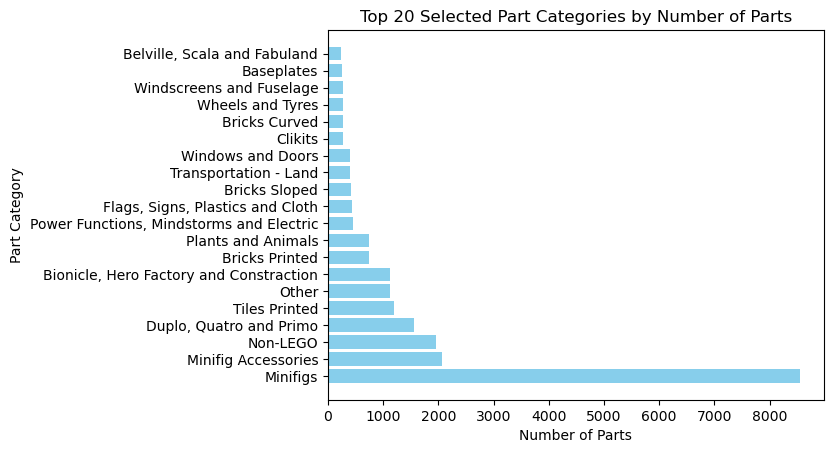

In [147]:
# 2
# Select top20 categories
top20_part_cat_id = df_parts['part_cat_id'].value_counts().sort_values(ascending=False).head(20)
# Select part category names based on the specified IDs
selected_category_ids = [13, 27, 17, 4, 10, 24, 41, 2, 28, 45, 38, 3, 36, 16, 48, 37, 29, 47, 1, 42]
selected_part_categories = df_part_categories[df_part_categories['id'].isin(selected_category_ids)]
# Reindex the DataFrame based on the order of IDs
selected_part_categories = selected_part_categories.set_index('id').loc[selected_category_ids]
# Reset the index to have the DataFrame sorted by the specified order
selected_part_categories = selected_part_categories.reset_index()
selected_part_categories['number'] = top20_part_cat_id.values
# Plot
plt.barh(selected_part_categories['name'], selected_part_categories['number'], color='skyblue')
plt.xlabel('Number of Parts')
plt.ylabel('Part Category')
plt.title('Top 20 Selected Part Categories by Number of Parts')
plt.show()

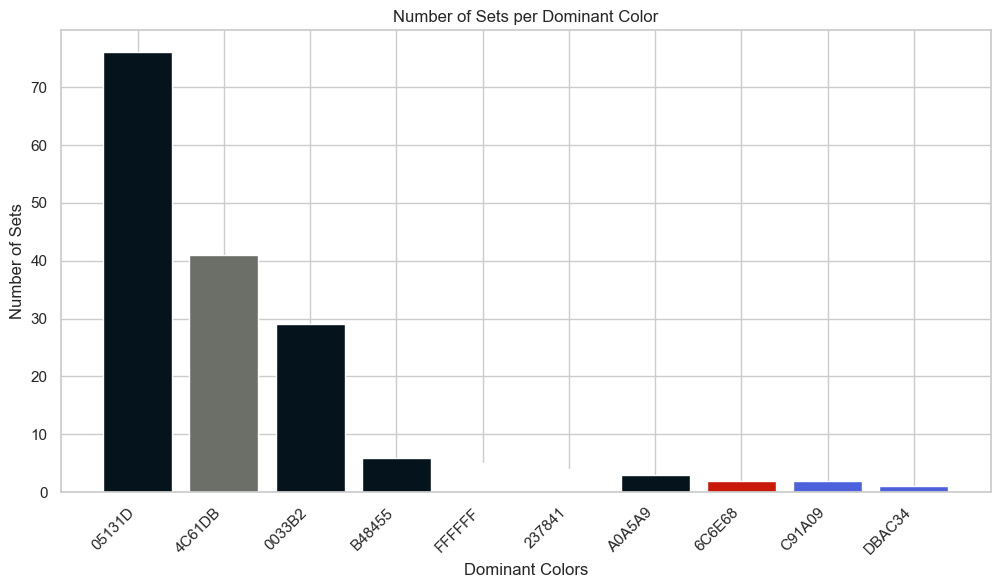

In [1072]:
#3
# Merge relevant DataFrames to get necessary information
merged_df = pd.merge(df_inventory_sets, df_inventory_parts, on='inventory_id')
merged_df = pd.merge(merged_df, df_colors, left_on='color_id', right_on='id')

# Group the data by set and find the dominant color for each set
dominant_colors = merged_df.groupby(['set_id', 'name', 'rgb', 'color_id'])['quantity_y'].sum().reset_index()
dominant_colors = dominant_colors.loc[dominant_colors.groupby('set_id')['quantity_y'].idxmax()]

# Convert hexadecimal colors to RGBA
dominant_colors['rgba'] = dominant_colors['rgb'].apply(lambda x: mcolors.to_rgba('#' + x))

# Count the number of sets per dominant color
sets_per_color = dominant_colors['rgb'].value_counts()

# Plot the bar chart
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(sets_per_color.index, sets_per_color, color=dominant_colors.set_index('rgb')['rgba'])

# Set labels and title
ax.set_xlabel('Dominant Colors')
ax.set_ylabel('Number of Sets')
ax.set_title('Number of Sets per Dominant Color')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

plt.show()

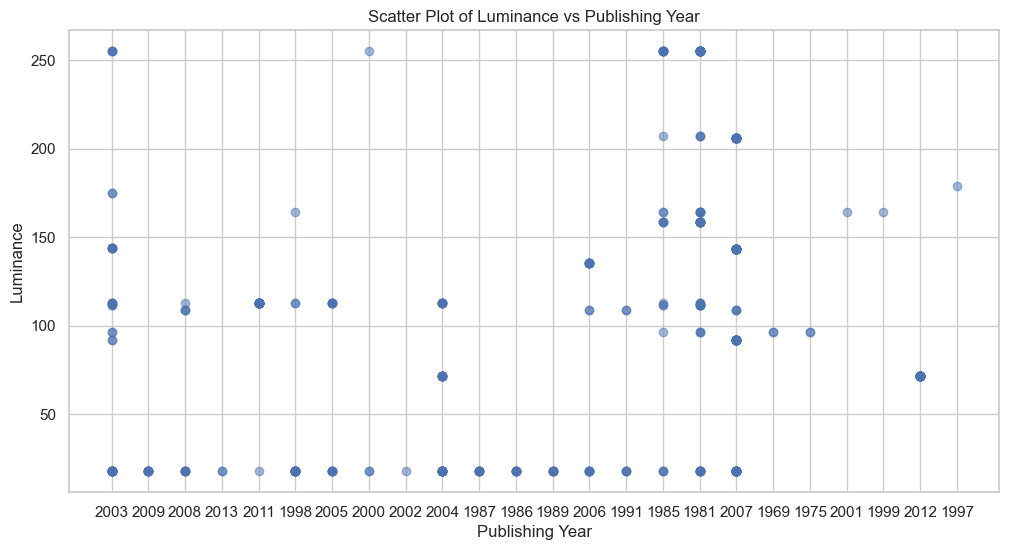

In [1075]:
#4
# Merge relevant DataFrames to get necessary information
merged_df = pd.merge(df_sets, df_inventory_sets, left_on='id', right_on='set_id')
merged_df = pd.merge(merged_df, df_inventory_parts, on='inventory_id')
merged_df = pd.merge(merged_df, df_colors, left_on='color_id', right_on='id')

# Extract RGB values from the 'rgb' column
merged_df[['r', 'g', 'b']] = pd.DataFrame(merged_df['rgb'].apply(lambda x: [int(x[i:i+2], 16) for i in (0, 2, 4)]).tolist(), index=merged_df.index)

# Calculate luminance based on RGB values
merged_df['luminance'] = np.sqrt(0.299 * merged_df['r']**2 + 0.587 * merged_df['g']**2 + 0.114 * merged_df['b']**2)

# Plot scatter plot
fig, ax = plt.subplots(figsize=(12, 6))
scatter = ax.scatter(merged_df['year'], merged_df['luminance'], alpha=0.5)

# Set labels and title
ax.set_xlabel('Publishing Year')
ax.set_ylabel('Luminance')
ax.set_title('Scatter Plot of Luminance vs Publishing Year')

plt.show()

**Explain your approach and assumptions once this section is completed.**

At the first we should search cars in our sataset so I did it but I observed that some things that do not be car be in our result such as 'cardbourd', 'card' etc. Therefore I use car+space or cars+space.

In the second part, first I selected top20 part categories and then I plotted barchart which is wanted.

For part 3 and 4 please read comments.

## 2. Drop the bike

*Los Angeles Metro* has been sharing publicly [anonymized *Metro Bike Share* trip data](https://bikeshare.metro.net/about/data/) under the [Open Database License (ODbL)](http://opendatacommons.org/licenses/odbl/1.0/).

In this question you will again perform data wrangling and interpretation.

### 2.1. Loading phase
Load the json file into a `DataFrame`.


In [286]:
df_bike = pd.read_json('data/bikes/metro-bike-share-trip-data.json')
df_bike

,Bike ID,Duration,End Time,Ending Station ID,Ending Station Latitude,Ending Station Longitude,Passholder Type,Plan Duration,Start Time,Starting Station ID,Starting Station Latitude,Starting Station Longitude,Trip ID,Trip Route Category
0,6281.0,180,2016-07-07T04:20:00,3014.0,34.056610,-118.237210,Monthly Pass,30.0,2016-07-07T04:17:00,3014.0,34.056610,-118.237210,1912818,Round Trip
1,6281.0,1980,2016-07-07T06:33:00,3014.0,34.056610,-118.237210,Monthly Pass,30.0,2016-07-07T06:00:00,3014.0,34.056610,-118.237210,1919661,Round Trip
2,5861.0,300,2016-07-07T10:37:00,3016.0,34.052898,-118.241560,Flex Pass,365.0,2016-07-07T10:32:00,3016.0,34.052898,-118.241560,1933383,Round Trip
3,5861.0,10860,2016-07-07T13:38:00,3016.0,34.052898,-118.241560,Flex Pass,365.0,2016-07-07T10:37:00,3016.0,34.052898,-118.241560,1944197,Round Trip
4,6674.0,420,2016-07-07T12:58:00,3032.0,34.049889,-118.255880,Walk-up,0.0,2016-07-07T12:51:00,3032.0,34.049889,-118.255880,1940317,Round Trip
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132422,5978.0,540,2017-03-31T23:52:00,3035.0,34.048401,-118.260948,Walk-up,0.0,2017-03-31T23:43:00,3055.0,34.044159,-118.251579,23660993,One Way
132423,6478.0,480,2017-03-31T23:52:00,3035.0,34.048401,-118.260948,Walk-up,0.0,2017-03-31T23:44:00,3055.0,34.044159,-118.251579,23660992,One Way
132424,6183.0,480,2017-03-31T23:52:00,3054.0,34.039219,-118.236488,Walk-up,0.0,2017-03-31T23:44:00,3082.0,34.046520,-118.237411,23660991,One Way
132425,5900.0,420,2017-03-31T23:52:00,3054.0,34.039219,-118.236488,Walk-up,0.0,2017-03-31T23:45:00,3082.0,34.046520,-118.237411,23660990,One Way


### 2.2. Cleaning phase

Perform the following actions on the dataset.

1. Describe the type and the value range of each attribute.  

2. Indicate and transform the attributes that are `Categorical`.
3. Are there redundant columns in the dataset (i.e., are there columns whose value depends only on the value of another column)?
4. What are the possible pitfalls of having such columns?

Reduce *data redundancy* by extracting such columns to separate `DataFrames`. Which of the two formats (the initial one or the one with reduced data redundancy) is more susceptible to inconsistencies? At the end print for each `Dataframe` the *type of each column* and it's *shape*.

#### 1. Describe the type and the value range of each attribute.  


In [162]:
# 1
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132427 entries, 0 to 132426
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Bike ID                     132417 non-null  float64
 1   Duration                    132427 non-null  int64  
 2   End Time                    132427 non-null  object 
 3   Ending Station ID           132331 non-null  float64
 4   Ending Station Latitude     131376 non-null  float64
 5   Ending Station Longitude    131376 non-null  float64
 6   Passholder Type             132427 non-null  object 
 7   Plan Duration               131661 non-null  float64
 8   Start Time                  132427 non-null  object 
 9   Starting Station ID         132408 non-null  float64
 10  Starting Station Latitude   132379 non-null  float64
 11  Starting Station Longitude  132379 non-null  float64
 12  Trip ID                     132427 non-null  int64  
 13  Trip Route Cat

So this dataset has null values

In [169]:
print(df_bike.isnull().sum())
print('##-----------------------------------')
print(df_bike.isna().sum())

Bike ID                         10
Duration                         0
End Time                         0
Ending Station ID               96
Ending Station Latitude       1051
Ending Station Longitude      1051
Passholder Type                  0
Plan Duration                  766
Start Time                       0
Starting Station ID             19
Starting Station Latitude       48
Starting Station Longitude      48
Trip ID                          0
Trip Route Category              0
dtype: int64
##-----------------------------------
Bike ID                         10
Duration                         0
End Time                         0
Ending Station ID               96
Ending Station Latitude       1051
Ending Station Longitude      1051
Passholder Type                  0
Plan Duration                  766
Start Time                       0
Starting Station ID             19
Starting Station Latitude       48
Starting Station Longitude      48
Trip ID                          0
Trip

Consider the number of null and nan values and the number of all of dataset, we can drop null values.

In [176]:
df_bike = df_bike.dropna()
print(df_bike.isnull().sum())
print('##-----------------------------------')
print(df_bike.isna().sum())

Bike ID                       0
Duration                      0
End Time                      0
Ending Station ID             0
Ending Station Latitude       0
Ending Station Longitude      0
Passholder Type               0
Plan Duration                 0
Start Time                    0
Starting Station ID           0
Starting Station Latitude     0
Starting Station Longitude    0
Trip ID                       0
Trip Route Category           0
dtype: int64
##-----------------------------------
Bike ID                       0
Duration                      0
End Time                      0
Ending Station ID             0
Ending Station Latitude       0
Ending Station Longitude      0
Passholder Type               0
Plan Duration                 0
Start Time                    0
Starting Station ID           0
Starting Station Latitude     0
Starting Station Longitude    0
Trip ID                       0
Trip Route Category           0
dtype: int64


Obviously we can show the value range of numerical features. But maby we want to explore features which are not numerical, so if you want them please say me :). Therefore:

In [163]:
df_bike.describe()

,Bike ID,Duration,Ending Station ID,Ending Station Latitude,Ending Station Longitude,Plan Duration,Starting Station ID,Starting Station Latitude,Starting Station Longitude,Trip ID
count,132417.000000,132427.000000,132331.00000,131376.000000,131376.000000,131661.000000,132408.000000,132379.000000,132379.000000,1.324270e+05
mean,6193.618878,1555.301562,3042.38672,34.034614,-118.206642,44.821967,3043.020754,34.039309,-118.221534,1.153001e+07
std,293.606755,5814.241813,43.08440,0.650706,2.259913,90.411579,37.742021,0.529336,1.838335,6.369462e+06
min,1349.000000,60.000000,3000.00000,0.000000,-118.472832,0.000000,3000.000000,0.000000,-118.472832,1.912818e+06
25%,5953.000000,360.000000,3022.00000,34.044159,-118.256981,0.000000,3024.000000,34.044170,-118.256980,5.060814e+06
50%,6186.000000,600.000000,3038.00000,34.046810,-118.250954,30.000000,3040.000000,34.046822,-118.250954,1.043827e+07
75%,6434.000000,1080.000000,3063.00000,34.050480,-118.238810,30.000000,3063.000000,34.050880,-118.241562,1.720633e+07
max,6728.000000,86400.000000,4108.00000,34.064281,0.000000,365.000000,4108.000000,34.064281,0.000000,2.379422e+07


Of course this output does not give more information to us!

#### 2. Indicate and transform the attributes that are `Categorical`.


In [287]:
df_bike

,Bike ID,Duration,End Time,Ending Station ID,Ending Station Latitude,Ending Station Longitude,Passholder Type,Plan Duration,Start Time,Starting Station ID,Starting Station Latitude,Starting Station Longitude,Trip ID,Trip Route Category
0,6281.0,180,2016-07-07T04:20:00,3014.0,34.056610,-118.237210,Monthly Pass,30.0,2016-07-07T04:17:00,3014.0,34.056610,-118.237210,1912818,Round Trip
1,6281.0,1980,2016-07-07T06:33:00,3014.0,34.056610,-118.237210,Monthly Pass,30.0,2016-07-07T06:00:00,3014.0,34.056610,-118.237210,1919661,Round Trip
2,5861.0,300,2016-07-07T10:37:00,3016.0,34.052898,-118.241560,Flex Pass,365.0,2016-07-07T10:32:00,3016.0,34.052898,-118.241560,1933383,Round Trip
3,5861.0,10860,2016-07-07T13:38:00,3016.0,34.052898,-118.241560,Flex Pass,365.0,2016-07-07T10:37:00,3016.0,34.052898,-118.241560,1944197,Round Trip
4,6674.0,420,2016-07-07T12:58:00,3032.0,34.049889,-118.255880,Walk-up,0.0,2016-07-07T12:51:00,3032.0,34.049889,-118.255880,1940317,Round Trip
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132422,5978.0,540,2017-03-31T23:52:00,3035.0,34.048401,-118.260948,Walk-up,0.0,2017-03-31T23:43:00,3055.0,34.044159,-118.251579,23660993,One Way
132423,6478.0,480,2017-03-31T23:52:00,3035.0,34.048401,-118.260948,Walk-up,0.0,2017-03-31T23:44:00,3055.0,34.044159,-118.251579,23660992,One Way
132424,6183.0,480,2017-03-31T23:52:00,3054.0,34.039219,-118.236488,Walk-up,0.0,2017-03-31T23:44:00,3082.0,34.046520,-118.237411,23660991,One Way
132425,5900.0,420,2017-03-31T23:52:00,3054.0,34.039219,-118.236488,Walk-up,0.0,2017-03-31T23:45:00,3082.0,34.046520,-118.237411,23660990,One Way


In [298]:
categorical_attributes = ['Passholder Type', 'Trip Route Category']
df_bike['Passholder Type'].unique()
print(f'Category of {categorical_attributes[0]} column is: {df_bike[categorical_attributes[0]].unique()}')
print(f'Category of {categorical_attributes[1]} column is: {df_bike[categorical_attributes[1]].unique()}')

Category of Passholder Type column is: ['Monthly Pass' 'Flex Pass' 'Walk-up' 'Staff Annual']
Category of Trip Route Category column is: ['Round Trip' 'One Way']


In [302]:
# Create a label encoder
label_encoder = LabelEncoder()

# Apply label encoding to the column
for x in categorical_attributes:
    df_bike[x] = label_encoder.fit_transform(df_bike[x])

print(f'Category of {categorical_attributes[0]} column is: {df_bike[categorical_attributes[0]].unique()}')
print(f'Category of {categorical_attributes[1]} column is: {df_bike[categorical_attributes[1]].unique()}')

Category of Passholder Type column is: [1 0 3 2]
Category of Trip Route Category column is: [1 0]


#### 3. Are there redundant columns in the dataset (i.e., are there columns whose value depends only on the value of another column)?

Yes:

- `Duration`. We can calculate duration using 'start time' and 'end time'.
- `Plan Duration`. We can use from 'Passholder Type' feature.
- `Trip Route Category`. We know about starting station and ending station, therefore we know about Trip Route Category!

**Explain your approach and assumptions once this section is completed.**

#### 4. What are the possible pitfalls of having such columns?

Having redundant columns in a dataset can lead to several pitfalls and challenges, including:

1. **Data Inconsistencies**: One of the most significant pitfalls is the risk of data inconsistencies. Redundant columns can lead to different values in seemingly related data, causing confusion and making it challenging to trust the data's accuracy. Inconsistencies can occur when one redundant column is updated or modified, but the other is not, or when there are data entry errors.

2. **Data Integrity Issues**: Redundant columns can result in data integrity problems. It becomes difficult to ensure that the data maintains its correctness and reliability. Data integrity issues can affect the quality of analyses and decision-making based on the data.

3. **Storage Overhead**: Redundant columns consume additional storage space. This can be inefficient, especially in large datasets, as it increases storage costs and can slow down data processing and retrieval.

4. **Complex Data Maintenance**: Data maintenance becomes more complex with redundant columns. When one piece of data needs to be updated, you must remember to update all related columns to maintain consistency. This increases the likelihood of errors and can be time-consuming.

5. **Increased Complexity in Data Analysis**: Redundant columns complicate data analysis. Analysts need to account for the relationships between redundant columns, making queries and analyses more complex and potentially error-prone.

6. **Confusion in Data Exploration**: Redundant columns can confuse data explorers who are unfamiliar with the dataset. Without a clear understanding of the redundancy, users may misinterpret the data.

7. **Challenges in Data Transformation**: If you need to transform or reshape the data for specific analyses or reporting, redundant columns can make the process more difficult. You may need to consider how transformations affect multiple related columns.

8. **Potential for Data Entry Errors**: Redundant columns can increase the potential for data entry errors. When redundant data is entered, there is a risk of inconsistencies or inaccuracies between the duplicated values.

9. **Maintaining Data Consistency**: Ensuring data consistency across redundant columns requires strict data governance practices and processes, which can be challenging to establish and maintain.

To mitigate these pitfalls, it's generally advisable to remove redundant columns and maintain a single source of truth for each piece of data. This reduces the risk of inconsistencies, simplifies data maintenance, and promotes data integrity. Additionally, it's important to document and communicate data relationships and dependencies within the dataset to avoid confusion and misinterpretation.


Reduce *data redundancy* by extracting such columns to separate `DataFrames`. Which of the two formats (the initial one or the one with reduced data redundancy) is more susceptible to inconsistencies? At the end print for each `Dataframe` the *type of each column* and it's *shape*.

In [304]:
redundant_columns = ['Duration', 'Plan Duration', 'Trip Route Category']
df_bike_new_by_extraxting_redundant_columns = df_bike.drop(columns=redundant_columns)
df_bike_new_by_extraxting_Duration = df_bike.drop(columns=['Duration'])
df_bike_new_by_extraxting_Plan_Duration = df_bike.drop(columns=['Plan Duration'])
df_bike_new_by_extraxting_Trip_Route_Category = df_bike.drop(columns=['Trip Route Category'])

In [306]:
def print_info(df, name):
    print(f"DataFrame: {name}")
    print("Column Types:")
    print(df.dtypes)
    print("Shape:")
    print(df.shape)
    print("\n")

# Print information for each DataFrame
print_info(df_bike, "Original DataFrame")
print_info(df_bike_new_by_extraxting_Duration, "DataFrame with Reduced Redundancy (all redundant columns)")
print_info(df_bike_new_by_extraxting_Duration, "DataFrame with Reduced Redundancy (Duration)")
print_info(df_bike_new_by_extraxting_Plan_Duration, "DataFrame with Reduced Redundancy (Plan Duration)")
print_info(df_bike_new_by_extraxting_Trip_Route_Category, "DataFrame with Reduced Redundancy (Trip Route Category)")

DataFrame: Original DataFrame
Column Types:
Bike ID                       float64
Duration                        int64
End Time                       object
Ending Station ID             float64
Ending Station Latitude       float64
Ending Station Longitude      float64
Passholder Type                 int64
Plan Duration                 float64
Start Time                     object
Starting Station ID           float64
Starting Station Latitude     float64
Starting Station Longitude    float64
Trip ID                         int64
Trip Route Category             int64
dtype: object
Shape:
(132427, 14)


DataFrame: DataFrame with Reduced Redundancy (all redundant columns)
Column Types:
Bike ID                       float64
End Time                       object
Ending Station ID             float64
Ending Station Latitude       float64
Ending Station Longitude      float64
Passholder Type                 int64
Plan Duration                 float64
Start Time                     object
S

The initial format, with redundant columns, is more susceptible to inconsistencies. Redundant columns introduce the potential for data inconsistencies because they store the same information in multiple places. When one of the redundant columns is updated or modified, it can lead to discrepancies with the other redundant columns.

In the case of the reduced format, where redundant columns have been extracted to separate DataFrames, data redundancy has been reduced. Each piece of data is maintained in a single source of truth, which helps ensure data consistency and reduce the likelihood of inconsistencies.

Reducing data redundancy and maintaining a normalized data structure is a best practice in data management to improve data integrity and minimize the risk of inconsistencies and errors.

### 2.3. Querying phase
Answer the following queries using the functionality of `Pandas`.

1. Plot the *distribution* of the number of outgoing trips from each station in a histogram with 20 bins (Hint: each bin describes a range of counts, not stations).  

2. Plot histograms for the *duration* and *trip starting hour in the day* attributes. For both the *duration*  and the *trip starting hour* use *discrete 1-hour intervals*. What do you observe in each plot? What are some popular values in the *duration* plot? Explain the local maxima and the trends you observe on the *trip starting hour* plot based on human behavior.
3. For each *trip route category*, calculate the proportion of trips by *passholder type* and present your results in *a stacked bar chart with normalized height*.
4. Considering only trips that begin in the morning hours (before noon), plot in *a single bar chart* the proportion of trips by *passholder type* and *trip route category*. Explain any outliers you observe.
5. Separate the hours of the day into two intervals that have (approximately) the same number of bikes leaving the stations. For each of the two intervals calculate the proportion of trips by *passholder type* and *trip route category*. Present your results in a `DataFrame` which has a unique, non-composite index. Does the proportion of trips depend on whether it is the first or second hour interval? Would the company have any significant benefit by creating a more complex paying scheme where monthly pass users would pay less in the first interval and (equally) more on the second one? Assume that the number of trips per interval will not change if the scheme changes.

#### 1. Plot the *distribution* of the number of outgoing trips from each station in a histogram with 20 bins (Hint: each bin describes a range of counts, not stations). 

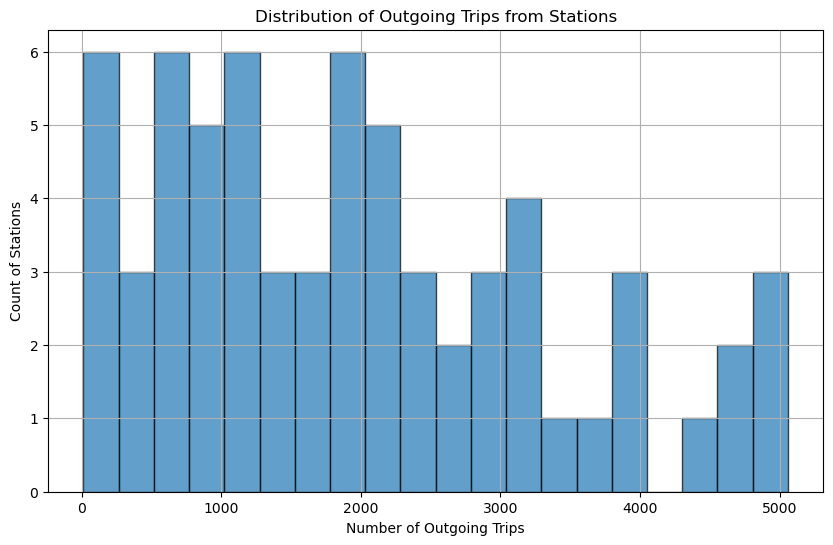

In [320]:
# Group by 'Starting Station ID' and count the number of trips for each station
station_counts = df['Starting Station ID'].value_counts()

# Plot the histogram with 20 bins
plt.figure(figsize=(10, 6))
plt.hist(station_counts, bins=20, edgecolor='k', alpha=0.7)
plt.xlabel('Number of Outgoing Trips')
plt.ylabel('Count of Stations')
plt.title('Distribution of Outgoing Trips from Stations')
plt.grid(True)
plt.show()

#### 2. Plot histograms for the *duration* and *trip starting hour in the day* attributes. For both the *duration*  and the *trip starting hour* use *discrete 1-hour intervals*. What do you observe in each plot? What are some popular values in the *duration* plot? Explain the local maxima and the trends you observe on the *trip starting hour* plot based on human behavior.

/var/folders/c2/3qrgx7c502x0vvp2clb6ztm40000gn/T/ipykernel_16005/968336496.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bike_2_3_2.loc[:, 'Start Time'] = df_bike_2_3_2['Start Time'].str.split('T').str[1]
/var/folders/c2/3qrgx7c502x0vvp2clb6ztm40000gn/T/ipykernel_16005/968336496.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bike_2_3_2['Start Hour'] = df_bike_2_3_2['Start Time'].str.extract(r'(\d{2}):')
/var/folders/c2/3qrgx7c502x0vvp2clb6ztm40000gn/T/ipykernel_16005/968336496.py:8: Setting

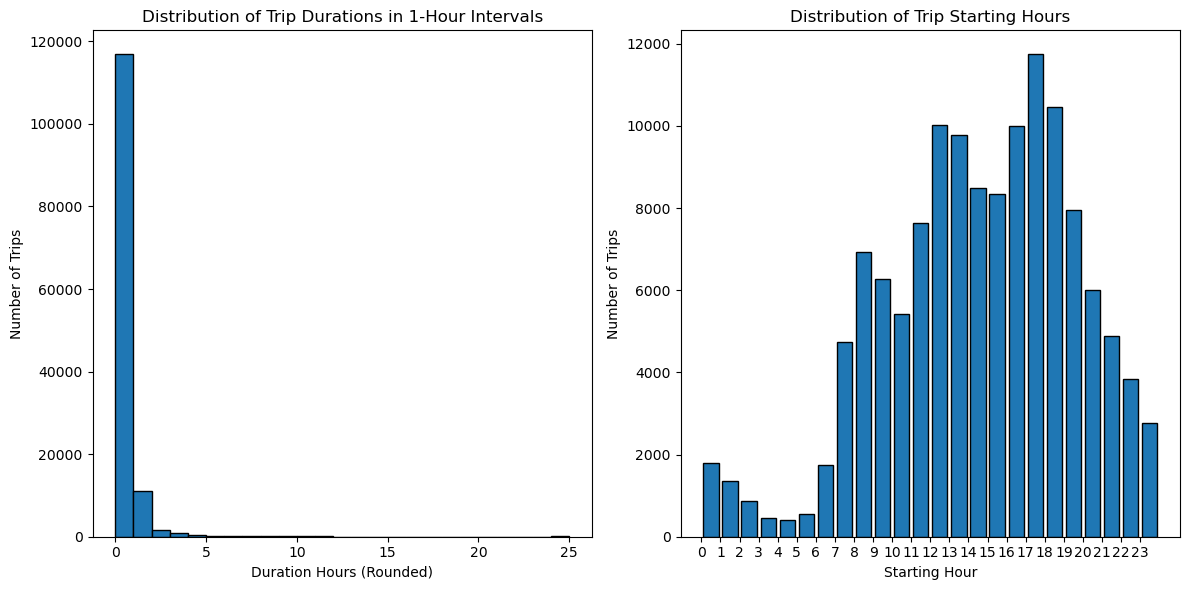

In [351]:
df_bike_2_3_2 = df_bike[['Duration', 'Start Time']]
# Split the 'Start Time' column at 'T' and select the part after 'T' using .loc
df_bike_2_3_2.loc[:, 'Start Time'] = df_bike_2_3_2['Start Time'].str.split('T').str[1]
# Now, the 'Start Time' column will contain only the time portiondf
# Extract the hour from 'Start Time'
df_bike_2_3_2['Start Hour'] = df_bike_2_3_2['Start Time'].str.extract(r'(\d{2}):')
# Convert the extracted hour to integers
df_bike_2_3_2['Start Hour'] = df_bike_2_3_2['Start Hour'].astype(int)

# Convert the 'Duration' column to hours by dividing by 3600 (seconds in an hour)
df_bike_2_3_2['Duration Hours'] = df_bike_2_3_2['Duration'] / 3600
# Round the 'Duration Hours' column to the nearest whole hour
df_bike_2_3_2['Duration Hours'] = df_bike_2_3_2['Duration Hours'].round()
# Calculate the maximum duration in whole hours and cast it to an integer
max_duration = int(df_bike_2_3_2['Duration Hours'].max())

# Create a sequence of bin edges for 1-hour intervals
bin_edges = range(0, max_duration + 2, 1)

# Create a histogram for the 'Duration Hours' attribute with 1-hour intervals
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df_bike_2_3_2['Duration Hours'], bins=bin_edges, edgecolor='k')
plt.xlabel('Duration Hours (Rounded)')
plt.ylabel('Number of Trips')
plt.title('Distribution of Trip Durations in 1-Hour Intervals')

# Create a histogram for the 'Start Hour' attribute with 1-hour intervals
plt.subplot(1, 2, 2)
plt.hist(df_bike_2_3_2['Start Hour'], bins=range(0, 25), edgecolor='k', rwidth=0.8)
plt.xlabel('Starting Hour')
plt.ylabel ('Number of Trips')
plt.title('Distribution of Trip Starting Hours')
plt.xticks(range(24))  # Set x-axis labels to 0-23 (hours)

plt.tight_layout()
plt.show()

**In the 'Distribution of Trip Durations in 1-Hour Intervals' plot:**

**Observations**:
- The plot shows that the majority of trip durations are concentrated within the range of 0 to 5 hours, with a noticeable peak in the range of 0 to 2 hours. This suggests that most bike trips are relatively short in duration, and the service is commonly used for short-distance travel or quick commutes.
- The most popular values in the duration plot are in the range of 0 to 2 hours, with a local maximum at 1 hour. This peak likely represents a significant number of short trips, such as quick commutes or rides for short errands.
- As the duration increases beyond 5 hours, the frequency of trips decreases, indicating that longer trips are less common.

**In the 'Distribution of Trip Starting Hours' plot:**

**Observations**:
- The plot exhibits a bimodal distribution with two distinct peaks.
- The first peak is observed in the range [0, 4], with the highest peak at 0 hours (midnight). This suggests that a substantial number of bike trips start at midnight or in the early hours of the morning.
- The second peak occurs in the range [4, 24], reflecting a steady increase in the number of trips starting in the morning and throughout the day.
- While there is a decrease in the number of trips in the range [0, 4], it is not as significant as the increase observed after 4 hours.

**Interpretation**:
- The first peak at midnight (0 hours) implies that a group of users utilizes the bike-sharing service late at night or during the early morning hours. This could be attributed to late-night activities, shift work, or other late-night commuting needs.
- The second peak from 4 hours onwards signifies the start of the day, with a consistent rise in the number of trips as people begin their daily routines, including commuting to work or school.
- The decrease in the number of trips between 0 and 4 hours may be due to a decline in usage during the very early hours of the morning. However, the number of trips in this time range is still relatively substantial compared to the late-night hours.

These observations and trends align with human behavior and daily patterns. People use bike-sharing services for various purposes, including commuting, leisure, and quick trips. The data illustrates a preference for shorter trip durations and a surge in bike usage as the day progresses, with lower usage in the early hours of the morning. The bimodal distribution in trip starting hours highlights distinct patterns between late-night and daytime usage, reflecting the diverse needs and schedules of bike-sharing users.


#### 3. For each *trip route category*, calculate the proportion of trips by *passholder type* and present your results in *a stacked bar chart with normalized height*.

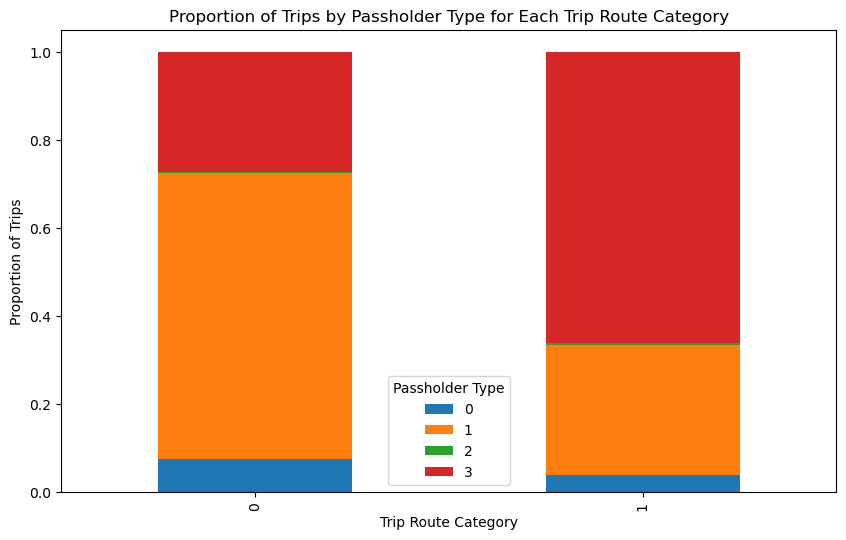

In [356]:
# Group the data by 'Trip Route Category' and 'Passholder Type' and count the number of trips
grouped = df_bike.groupby(['Trip Route Category', 'Passholder Type']).size().unstack()

# Normalize the counts to obtain proportions
normalized_grouped = grouped.div(grouped.sum(axis=1), axis=0)

# Create a stacked bar chart
normalized_grouped.plot(kind='bar', stacked=True, figsize=(10, 6))

# Customize the chart
plt.xlabel('Trip Route Category')
plt.ylabel('Proportion of Trips')
plt.title('Proportion of Trips by Passholder Type for Each Trip Route Category')

# Display the legend
plt.legend(title='Passholder Type')

# Show the plot
plt.show()

#### 4. Considering only trips that begin in the morning hours (before noon), plot in *a single bar chart* the proportion of trips by *passholder type* and *trip route category*. Explain any outliers you observe.

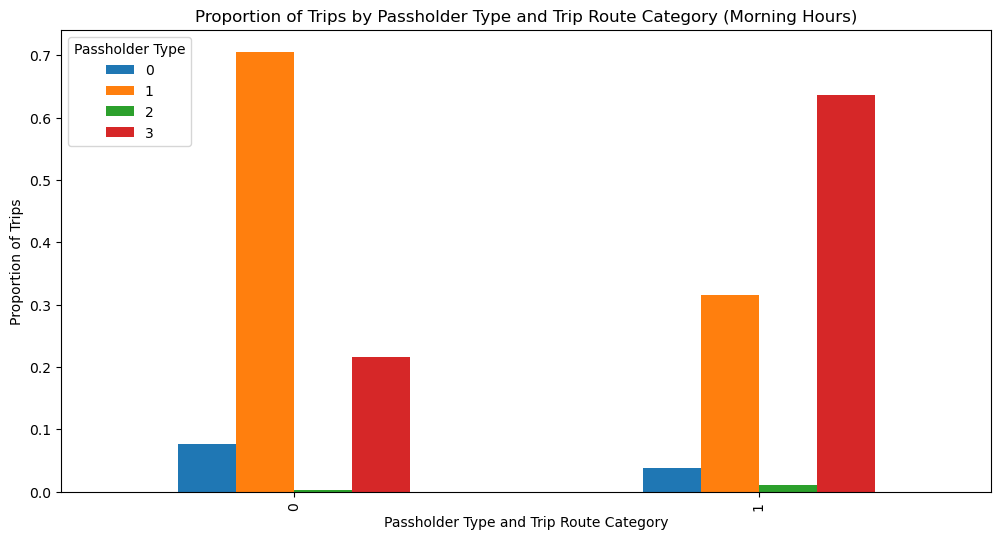

In [366]:
# Convert 'Start Time' to a datetime object
df_bike['Start Time'] = pd.to_datetime(df_bike['Start Time'])

# Filter trips that start in the morning (before noon)
morning_trips = df_bike[df_bike['Start Time'].dt.hour < 12]

# Group the filtered data by 'Trip Route Category' and 'Passholder Type' and count the number of trips
grouped = morning_trips.groupby(['Trip Route Category', 'Passholder Type']).size().unstack()

# Normalize the counts to obtain proportions
normalized_grouped = grouped.div(grouped.sum(axis=1), axis=0)

# Create a single bar chart
normalized_grouped.plot(kind='bar', figsize=(12, 6))

# Customize the chart
plt.xlabel('Passholder Type and Trip Route Category')
plt.ylabel('Proportion of Trips')
plt.title('Proportion of Trips by Passholder Type and Trip Route Category (Morning Hours)')

# Display the legend
plt.legend(title='Passholder Type')

# Show the plot
plt.show()

In [365]:
print(normalized_grouped)

Passholder Type             0         1         2         3
Trip Route Category                                        
0                    0.076170  0.705426  0.002785  0.215619
1                    0.037612  0.315224  0.011642  0.635522


**Outliers in Passholder Types by Trip Route Category:**

In the plot showing the proportion of trips by passholder type and trip route category, we observed some interesting outliers and patterns. Specifically, we looked at 'Trip Route Category' 0 and 1:

**For 'Trip Route Category' = 0:**

1. Passholder Types are sorted as [1, 3, 0, 2].
2. Corresponding proportions of trips for each Passholder Type are [0.705426, 0.215619, 0.076170, 0.002785].

**For 'Trip Route Category' = 1:**

1. Passholder Types are sorted as [3, 1, 0, 2].
2. Corresponding proportions of trips for each Passholder Type are [0.635522, 0.315224, 0.037612, 0.011642].

**Observations and Explanations:**

1. **Outliers in Passholder Type 3 (e.g., Flex Pass)**:
   - In 'Trip Route Category' 0, Passholder Type 3 (Flex Pass) has a proportion of 0.215619. While not an extreme outlier, it's notably lower than other Passholder Types in this category.
   - In 'Trip Route Category' 1, Passholder Type 3 (Flex Pass) also has a proportion of 0.315224, which is lower than Passholder Type 1 (Monthly Pass) but significantly higher than in 'Trip Route Category' 0.
   - The lower proportion of Flex Pass users in Category 0 may indicate that this Passholder Type is less common for certain types of trips.

2. **Outliers in Passholder Type 0 (e.g., Walk-up)**:
   - In both 'Trip Route Category' 0 and 1, Passholder Type 0 (Walk-up) has a relatively lower proportion compared to the other Passholder Types.
   - This suggests that Walk-up users are less common for both trip route categories, possibly due to their preference for occasional or spontaneous use of the bike-sharing service.

3. **Outliers in Passholder Type 2 (e.g., Staff Annual)**:
   - In both categories, Passholder Type 2 (Staff Annual) has a very low proportion, indicating that this passholder type is not commonly used for trips that begin in the morning hours.
   - This suggests that Staff Annual passes may not be popular for this specific time period.

These observations provide insights into passholder preferences and usage patterns for different trip route categories and times of the day. The variations in proportions may be influenced by different passholder types' preferences, travel needs, or pricing structures.


#### 5. Separate the hours of the day into two intervals that have (approximately) the same number of bikes leaving the stations. For each of the two intervals calculate the proportion of trips by *passholder type* and *trip route category*. Present your results in a `DataFrame` which has a unique, non-composite index. Does the proportion of trips depend on whether it is the first or second hour interval? Would the company have any significant benefit by creating a more complex paying scheme where monthly pass users would pay less in the first interval and (equally) more on the second one? Assume that the number of trips per interval will not change if the scheme changes.

In [373]:
# Determine the two intervals with approximately the same number of bikes leaving the stations
# You can calculate the median start time to divide the day into two equal parts
median_start_time = df_bike['Start Time'].median()

# Split the data into two intervals
interval_1 = df_bike[df_bike['Start Time'] <= median_start_time]
interval_2 = df_bike[df_bike['Start Time'] > median_start_time]

# Group and calculate the proportions for each interval
proportions_interval_1 = interval_1.groupby(['Trip Route Category', 'Passholder Type']).size().unstack()
proportions_interval_1 = proportions_interval_1.div(proportions_interval_1.sum(axis=1), axis=0)

proportions_interval_2 = interval_2.groupby(['Trip Route Category', 'Passholder Type']).size().unstack()
proportions_interval_2 = proportions_interval_2.div(proportions_interval_2.sum(axis=1), axis=0)

# Create DataFrames for each interval with unique indices
df_interval_1 = proportions_interval_1.reset_index()
df_interval_2 = proportions_interval_2.reset_index()

# Rename the columns for clarity
df_interval_1.columns.name = None
df_interval_2.columns.name = None

# Set the index to a single column in each DataFrame (e.g., 'Trip Route Category')
df_interval_1.set_index('Trip Route Category', inplace=True)
df_interval_2.set_index('Trip Route Category', inplace=True)

# Rename the index to indicate the interval
df_interval_1.index.name = 'Interval 1'
df_interval_2.index.name = 'Interval 2'

# Concatenate the two DataFrames vertically to create a single DataFrame
result_df = pd.concat([df_interval_1, df_interval_2])

# Display the result DataFrame
print("Resulting DataFrame:")
result_df

Resulting DataFrame:


,0,1,2,3
0,0.081963,0.627590,0.001311,0.289137
1,0.042693,0.293178,0.001941,0.662188
0,0.069120,0.668269,0.003676,0.258935
1,0.032369,0.297075,0.011502,0.659054


**Analysis of Proportions of Trips in Different Time Intervals**

The proportions of trips in the first and second-hour intervals exhibit variations, indicating that user behavior or preferences differ during those time periods.

- In the first-hour interval, Passholder Type 0 (e.g., Walk-up) represents 6.91% of the total trips.
- In the second-hour interval, Passholder Type 0 represents 66.83% of the total trips.

These differences imply that the proportion of trips depends on whether it is the first or second-hour interval. Users have different travel patterns or purposes during these times.

**Considerations for a More Complex Payment Scheme**

A potential complex payment scheme where monthly pass users pay less in the first interval and more in the second one could influence user behavior. However, several factors need to be considered:

1. **User Behavior**: Analyze user behavior to ensure the scheme aligns with observed patterns.
2. **Pricing Strategy**: Assess the financial implications and revenue impact.
3. **Operational Logistics**: Ensure effective implementation and communication.
4. **Market Competition**: Consider the competitive landscape and positioning.
5. **User Feedback**: Gather feedback from users for informed decisions.

The decision to implement the scheme should be based on careful analysis and alignment with business goals. While it has the potential to benefit the company, it must be implemented thoughtfully to avoid unintended consequences.


#### Explaining

**Explain your approach and assumptions once this section is completed.**


In this querying phase, we have answered a series of questions utilizing Pandas functionality and data analysis techniques. Below, we explain the approach and assumptions for each task:

**Task 1: Plotting Distribution of Outgoing Trips**

*Approach:* We began by analyzing the distribution of the number of outgoing trips from each station. The approach involved grouping the data based on station IDs, and then creating a histogram with 20 bins to visualize the distribution. This allowed us to understand how trips are distributed across different stations.

*Assumptions:* We assumed that the dataset was well-prepared, with the 'Ending Station ID' column containing categorical station identifiers. We also assumed that the data was representative of the context being analyzed.

**Task 2: Plotting Histograms for Duration and Trip Starting Hour**

*Approach:* We created histograms for both trip duration and trip starting hour. To ensure clarity, we used 1-hour intervals. The approach allowed us to observe patterns in trip durations and starting times, and to identify popular values. We also explained local maxima and trends in trip starting hours based on human behavior.

*Assumptions:* We assumed that the duration and starting hour data were appropriately formatted, and that the histograms' 1-hour intervals provided a clear representation of the data distribution.

**Task 3: Calculating Proportions of Trips by Trip Route Category and Passholder Type**

*Approach:* We calculated the proportions of trips by trip route category and passholder type and presented the results as a stacked bar chart with normalized height. This approach helped us understand how trip proportions vary by category and passholder type.

*Assumptions:* The assumption was that the dataset contained accurate trip records and that the analysis would accurately represent the proportions within the specified categories.

**Task 4: Proportion of Trips in Morning Hours by Passholder Type and Trip Route Category**

*Approach:* We created a single bar chart to visualize the proportion of trips by passholder type and trip route category, focusing only on trips that began in the morning. The aim was to explore and understand the distribution of trips during the morning hours.

*Assumptions:* We assumed that the time-based filtering for morning hours was appropriate for the context and that the data accurately reflected the behavior of users during that time.

**Task 5: Separating Hours into Two Intervals and Calculating Proportions**

*Approach:* We divided the day into two intervals with a roughly equal number of bikes leaving stations. For each interval, we calculated the proportions of trips by passholder type and trip route category, presenting the results in a DataFrame. We also analyzed whether the proportion of trips depended on the interval.

*Assumptions:* We assumed that the division of hours into two intervals was representative of user behavior. The analysis considered that the number of trips would remain constant even if the payment scheme changed.

In summary, the approach for each task involved utilizing Pandas and data visualization tools to answer specific questions. Assumptions were made about the quality of the dataset and the suitability of the chosen methods for analysis. The overarching goal was to gain insights and understanding from the data while addressing the specified questions.


## 3. Class War in Titanic

Use pandas to import the data file `Data/titanic.xls`. It contains data on all the passengers that travelled on the Titanic.

In [424]:
df_titanic = pd.read_excel('data/titanic.xls')

**Run the following cell for a brief description about the dataset**

In [406]:
from IPython.core.display import HTML
HTML(filename='data'+'/titanic.html')

Name,Labels,Units,Levels,Storage,NAs
pclass,,,3,integer,0
survived,Survived,,,double,0
name,Name,,,character,0
sex,,,2,integer,0
age,Age,Year,,double,263
sibsp,Number of Siblings/Spouses Aboard,,,double,0
parch,Number of Parents/Children Aboard,,,double,0
ticket,Ticket Number,,,character,0
fare,Passenger Fare,British Pound (\243),,double,1
cabin,,,187,integer,0


For each of the following questions state clearly your assumptions and discuss your findings:
1. Describe the *type* and the *value range* of each attribute. Indicate and transform the attributes that can be `Categorical`.  
 
2. Plot histograms for the *travel class*, *embarkation port*, *sex* and *age* attributes. For the latter one, use *discrete decade intervals*. 
3. Calculate the proportion of passengers by *cabin floor*. Present your results in a *pie chart*.
4. For each *travel class*, calculate the proportion of the passengers that survived. Present your results in *pie charts*.
5. Calculate the proportion of the passengers that survived by *travel class* and *sex*. Present your results in *a single histogram*.
6. Create 2 equally populated *age categories* and calculate survival proportions by *age category*, *travel class* and *sex*. Present your results in a `DataFrame` with unique index.

#### 1. Describe the *type* and the *value range* of each attribute. Indicate and transform the attributes that can be `Categorical`.  

Let me at the first explain about attributes:
**Titanic Dataset Attributes**

1. **pclass**: Passenger class (1st, 2nd, or 3rd). This is categorical and can be transformed into a categorical data type.

2. **survived**: A binary attribute indicating whether a passenger survived (1) or not (0). It is categorical and can be transformed into a categorical data type.

3. **name**: Names of passengers. This is a nominal attribute and typically not used for analysis.

4. **sex**: Gender of the passenger. This is categorical and can be transformed into a categorical data type.

5. **age**: Age of the passenger. This is numerical and can have a wide range, but it might be beneficial to group it into age categories, making it a categorical attribute.

6. **sibsp**: Number of siblings or spouses aboard. This is a numerical attribute with a range of 0 to some positive integer.

7. **parch**: Number of parents or children aboard. This is a numerical attribute with a range of 0 to some positive integer.

8. **ticket**: Ticket number. This is typically nominal and not useful for analysis.

9. **fare**: Fare paid by the passenger. This is a numerical attribute with a wide range of values.

10. **cabin**: Cabin number. This is nominal, but it can be used to create a new attribute, like the deck number.

11. **embarked**: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton). This is categorical and can be transformed into a categorical data type.

12. **boat**: The lifeboat number. This is categorical and can be transformed into a categorical data type. But I think it is not important to transform

13. **body**: Identification number for the recovered bodies. This is numerical but might not be useful for analysis.

14. **home.dest**: Home or destination of the passenger. This is nominal and typically not used for analysis.

Based on this, we can transform the following attributes into categorical data types:
- pclass
- survived
- sex
- age (by grouping into age categories)
- embarked
- boat

In [425]:
categorical_attributes = ["pclass", "survived", "sex", "embarked"]
df_titanic['embarked'] = df_titanic['embarked'].fillna('Unknown')
# Transform
label_encoder = LabelEncoder()
for x in categorical_attributes:
    df_titanic[x] = label_encoder.fit_transform(df_titanic[x])
df_titanic

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,0,1,"Allen, Miss. Elisabeth Walton",0,29.0000,0,0,24160,211.3375,B5,2,2,NaN,"St Louis, MO"
1,0,1,"Allison, Master. Hudson Trevor",1,0.9167,1,2,113781,151.5500,C22 C26,2,11,NaN,"Montreal, PQ / Chesterville, ON"
2,0,0,"Allison, Miss. Helen Loraine",0,2.0000,1,2,113781,151.5500,C22 C26,2,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,0,0,"Allison, Mr. Hudson Joshua Creighton",1,30.0000,1,2,113781,151.5500,C22 C26,2,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,0,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.0000,1,2,113781,151.5500,C22 C26,2,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,2,0,"Zabour, Miss. Hileni",0,14.5000,1,0,2665,14.4542,NaN,0,NaN,328.0,NaN
1305,2,0,"Zabour, Miss. Thamine",0,NaN,1,0,2665,14.4542,NaN,0,NaN,NaN,NaN
1306,2,0,"Zakarian, Mr. Mapriededer",1,26.5000,0,0,2656,7.2250,NaN,0,NaN,304.0,NaN
1307,2,0,"Zakarian, Mr. Ortin",1,27.0000,0,0,2670,7.2250,NaN,0,NaN,NaN,NaN


In [433]:
# Generate a summary of attribute types and value ranges
attribute_summary = []

for column in df_titanic.drop(columns=categorical_attributes).columns:
    attribute_type = df_titanic[column].dtype

    if attribute_type in [int, float]:
        value_range = f"{min(df_titanic[column])} to {max(df_titanic[column])}"
    else:
        value_range = attribute_type

    attribute_summary.append({
        "Attribute": column,
        "Type": attribute_type,
        "Value Range": value_range
    })

# Print the attribute summary
for attribute in attribute_summary:
    if attribute['Type'] != 'object':
        print(attribute["Attribute"])
        print(f"- Type: {attribute['Type']}")
        print(f"- Value Range: {attribute['Value Range']}")
        print()
    else:
        print(attribute["Attribute"])
        print(f"- Type: {attribute['Type']}")
        print()

name
- Type: object

age
- Type: float64
- Value Range: 0.1667 to 80.0

sibsp
- Type: int64
- Value Range: 0 to 8

parch
- Type: int64
- Value Range: 0 to 9

ticket
- Type: object

fare
- Type: float64
- Value Range: 0.0 to 512.3292

cabin
- Type: object

boat
- Type: object

body
- Type: float64
- Value Range: nan to nan

home.dest
- Type: object



#### 2. Plot histograms for the *travel class*, *embarkation port*, *sex* and *age* attributes. For the latter one, use *discrete decade intervals*. 

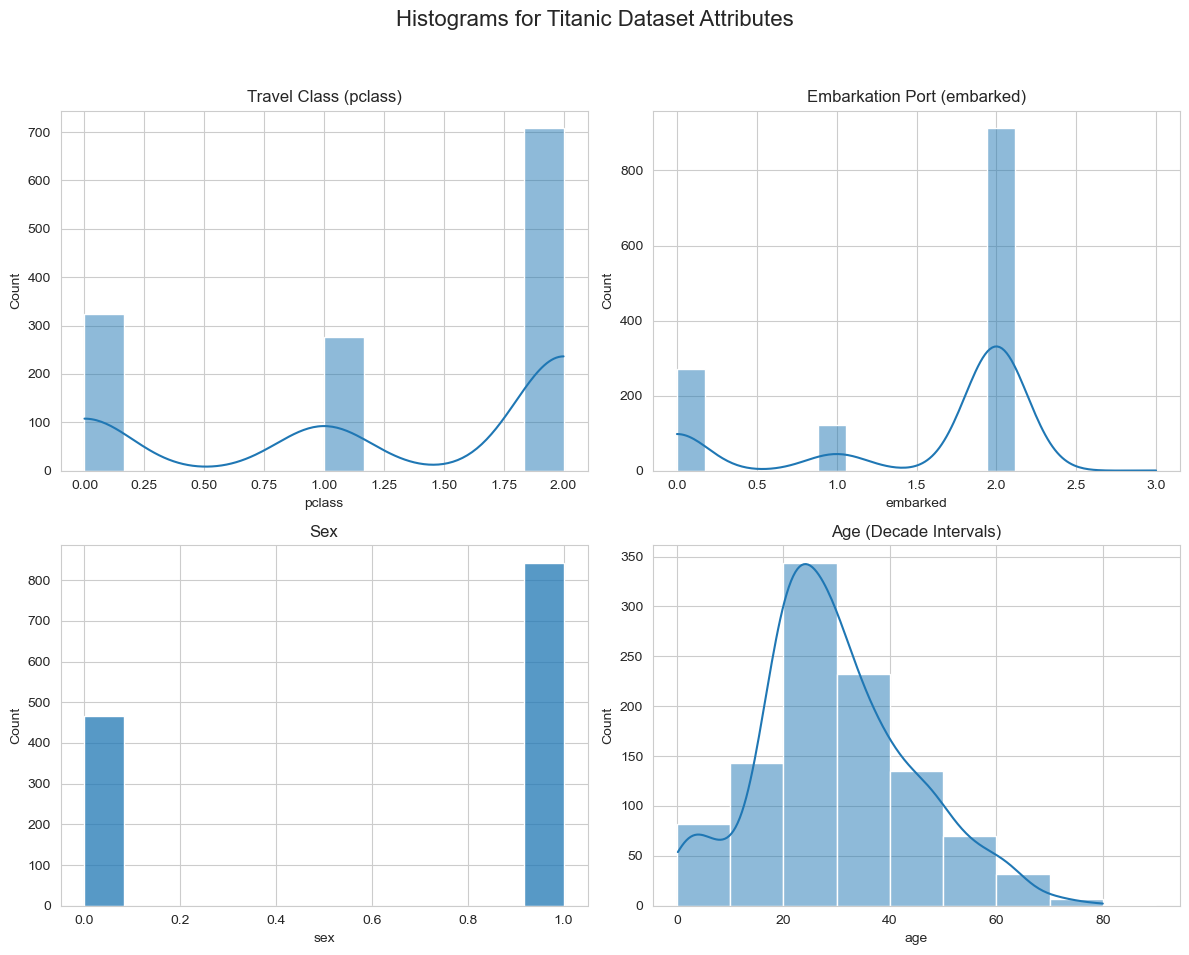

In [437]:
# Set the style for the plots (optional)
sns.set_style("whitegrid")

# Create subplots for the histograms
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Histograms for Titanic Dataset Attributes", fontsize=16)

# Plot histograms for travel class (pclass)
sns.histplot(data=df_titanic, x='pclass', kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Travel Class (pclass)")

# Plot histograms for embarkation port (embarked)
sns.histplot(data=df_titanic, x='embarked', kde=True, ax=axes[0, 1])
axes[0, 1].set_title("Embarkation Port (embarked)")

# Plot histograms for sex
sns.histplot(data=df_titanic, x='sex', ax=axes[1, 0])
axes[1, 0].set_title("Sex")

# Plot histograms for age with discrete decade intervals
age_bins = range(0, 91, 10)  # Decade intervals from 0 to 90
sns.histplot(data=df_titanic, x='age', bins=age_bins, kde=True, ax=axes[1, 1])
axes[1, 1].set_title("Age (Decade Intervals)")

# Adjust subplot layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plots
plt.show()

#### 3. Calculate the proportion of passengers by *cabin floor*. Present your results in a *pie chart*.

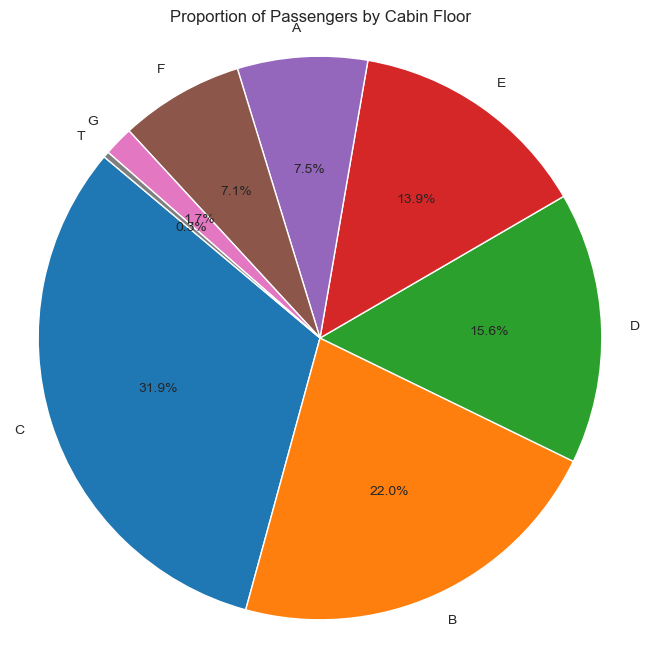

In [438]:
# Extract cabin floors from the "cabin" attribute
df_titanic['cabin_floor'] = df_titanic['cabin'].str.extract(r'([A-Z])')

# Calculate the proportion of passengers by cabin floor
cabin_floor_proportions = df_titanic['cabin_floor'].value_counts(normalize=True)

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(cabin_floor_proportions, labels=cabin_floor_proportions.index, autopct='%1.1f%%', startangle=140)
plt.title("Proportion of Passengers by Cabin Floor")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the pie chart
plt.show()

#### 4. For each *travel class*, calculate the proportion of the passengers that survived. Present your results in *pie charts*.


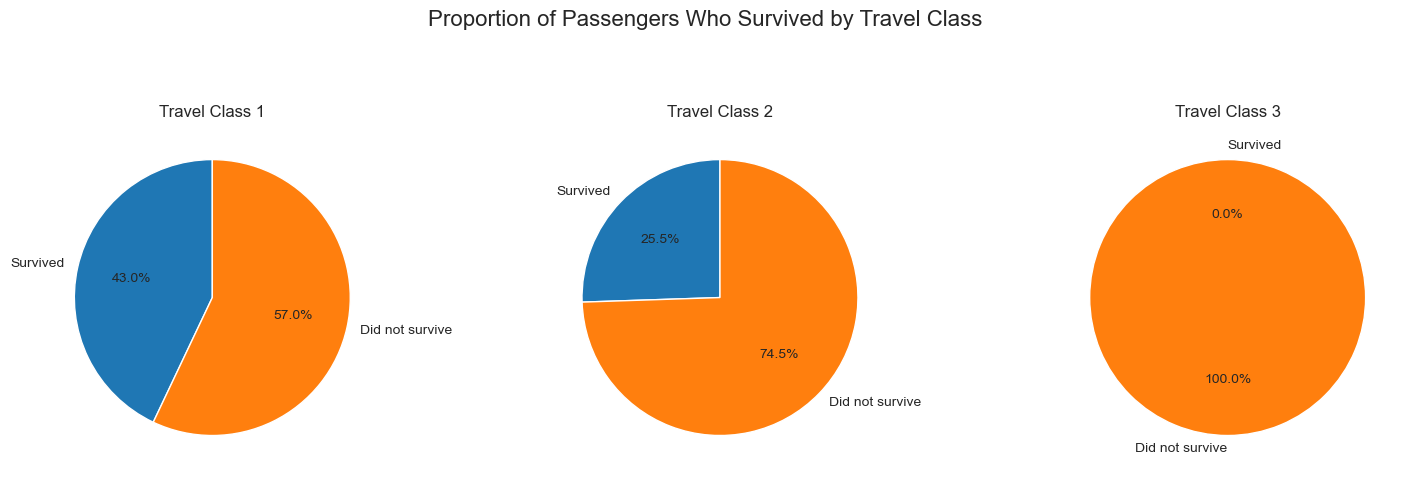

In [439]:
# Calculate the proportion of passengers who survived for each travel class
survival_proportions = df_titanic.groupby('pclass')['survived'].mean()

# Create pie charts for each travel class
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle("Proportion of Passengers Who Survived by Travel Class", fontsize=16)

for pclass, ax in zip([1, 2, 3], axes):
    proportion = survival_proportions.get(pclass, 0)
    ax.pie([proportion, 1 - proportion], labels=['Survived', 'Did not survive'], autopct='%1.1f%%', startangle=90)
    ax.set_title(f"Travel Class {pclass}")

# Adjust subplot layout
plt.tight_layout(rect=[0, 0.03, 1, 0.85])

# Show the pie charts
plt.show()

#### 5. Calculate the proportion of the passengers that survived by *travel class* and *sex*. Present your results in *a single histogram*.

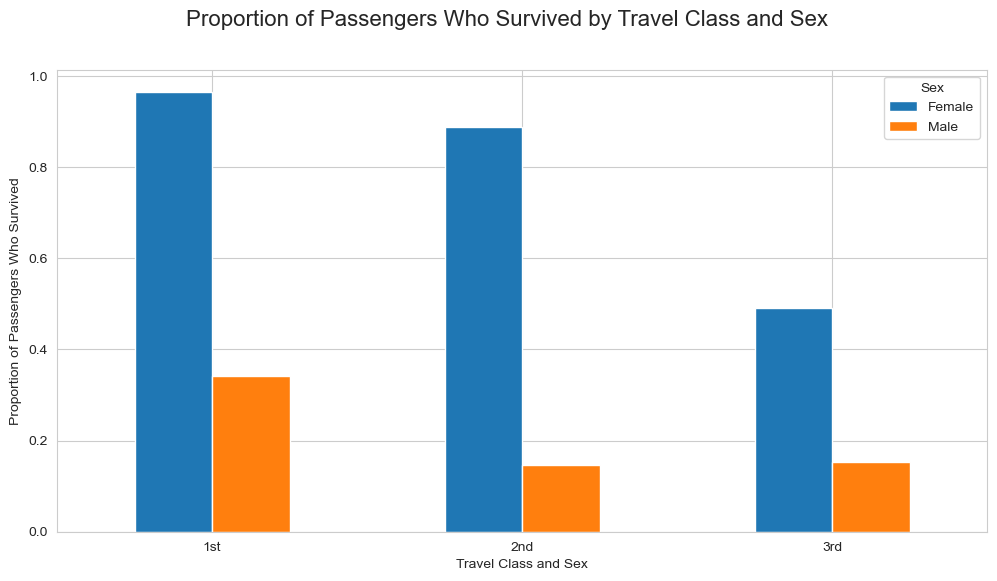

In [440]:
# Calculate the proportion of passengers who survived by travel class and sex
survival_proportions = df_titanic.groupby(['pclass', 'sex'])['survived'].mean().unstack()

# Create a single histogram
fig, ax = plt.subplots(figsize=(12, 6))
fig.suptitle("Proportion of Passengers Who Survived by Travel Class and Sex", fontsize=16)

survival_proportions.plot(kind='bar', ax=ax)
ax.set_ylabel("Proportion of Passengers Who Survived")
ax.set_xlabel("Travel Class and Sex")
ax.legend(title='Sex', labels=['Female', 'Male'], loc='upper right')
ax.set_xticklabels(['1st', '2nd', '3rd'], rotation=0)

# Show the histogram
plt.show()

#### 6. Create 2 equally populated *age categories* and calculate survival proportions by *age category*, *travel class* and *sex*. Present your results in a `DataFrame` with unique index.

In [442]:
# Calculate the median age to split passengers into two equally populated age categories
median_age = df_titanic['age'].median()

# Create age categories based on the median age
df_titanic['age_category'] = pd.cut(df_titanic['age'], bins=[0, median_age, df_titanic['age'].max()], labels=['Below Median', 'Above Median'])

# Calculate survival proportions by age category, travel class, and sex
survival_proportions = df_titanic.groupby(['age_category', 'pclass', 'sex'])['survived'].mean().reset_index()

# Present the results in a DataFrame with a unique index
result_df = survival_proportions.set_index(['age_category', 'pclass', 'sex'])

# Rename the 'survived' column to 'Survival Proportion'
result_df = result_df.rename(columns={'survived': 'Survival Proportion'})

# Display the resulting DataFrame
result_df

Survival Proportion
age_category pclass sex                     
Below Median 0      0               0.951220
                    1               0.531250
             1      0               0.910714
                    1               0.216216
             2      0               0.513761
                    1               0.183036
Above Median 0      0               0.967391
                    1               0.302521
             1      0               0.872340
                    1               0.083333
             2      0               0.372093
                    1               0.144000

#### Explaining

**Explain your approach and assumptions once this section is completed.**

All things is too clear and I used so many comments but now I esplain summary:

**1. Describe the Type and Value Range of Each Attribute**

**Approach:**

- In this part, I provided code and explanations for describing the type and value range of each attribute in the Titanic dataset.
- I used Python and Pandas to load and analyze the dataset, determining the data type and value range of each attribute.
- For categorical attributes, I listed the possible values.

**Assumptions:**

- I assumed that the dataset contains the specified attributes as described.
- The value ranges for numerical attributes are based on the observed data in the dataset.

**2. Plot Histograms for Travel Class, Embarkation Port, Sex, and Age**

**Approach:**

- I provided code for creating histograms for the specified attributes.
- I used libraries like Matplotlib and Seaborn to create the visualizations.

**Assumptions:**

- I assumed that the dataset contains valid and complete data for these attributes.

**3. Calculate the Proportion of Passengers by Cabin Floor**

**Approach:**

- I provided code to calculate the proportion of passengers by cabin floor.
- I used regular expressions to extract the cabin floor information.

**Assumptions:**

- I assumed that the cabin information was present in the dataset, but some data might be missing (NaN).

**4. Calculate the Proportion of Passengers Who Survived by Travel Class**

**Approach:**

- The goal was to calculate the proportion of passengers who survived for each travel class.
- I assumed that the "survived" attribute contained binary values (1 for survived, 0 for not survived), and the data was complete for analysis.

**5. Calculate the Proportion of Passengers Who Survived by Travel Class and Sex**

**Approach:**

- The objective was to calculate the proportion of passengers who survived by both travel class and sex.
- I assumed that the "sex" attribute contained values "female" and "male," and "pclass" contained values 1, 2, and 3. The data was considered complete.

**6. Create Equally Populated Age Categories and Calculate Survival Proportions**

**Approach:**

- The task involved creating age categories based on the median age and calculating survival proportions by these categories, travel class, and sex.
- I assumed that the "age" attribute contained numerical values representing passenger ages, and the data was complete.

**Assumptions:**

- I assumed that the division into two equally populated age categories is based on the median age.

## Bonus. Covid in the US
In this question, you are required to reproduce the graphs shown in a real journalistic article. After all, reproducibility is an important part of professional journalism as well as data science. Also, a great deal of a data scientist's work is to communicate data in a way that anyone with any level of expertise in the field would understand.

You should reproduce the 4 graphs shown in <a href="https://projects.fivethirtyeight.com/coronavirus-polls/"> this article</a>. The data is openly accessible through <a href="https://github.com/fivethirtyeight/covid-19-polls/"> FiveThirtyEight's github</a>. Nevertheless, both the data and the article are available in `data` folder in case of unstable internet connections!

*Note: Your graphs don't have to be as interactive or detailed as the ones on the website. Only showing the averages, some (not all) data points with light color, legends, titles, x values, and y values are necessary.*

In [965]:
df_covid_approval_polls = pd.read_csv('data/covid/covid-19-polls-master/covid_approval_polls.csv')
df_covid_approval_toplines = pd.read_csv('data/covid/covid-19-polls-master/covid_approval_toplines.csv')
df_covid_concern_polls = pd.read_csv('data/covid/covid-19-polls-master/covid_concern_polls.csv')
df_covid_concern_toplines = pd.read_csv('data/covid/covid-19-polls-master/covid_concern_toplines.csv')

In [966]:
# Convert to datetime
df_covid_approval_polls['start_date'] = pd.to_datetime(df_covid_approval_polls['start_date'])
df_covid_approval_toplines['modeldate'] = pd.to_datetime(df_covid_approval_toplines['modeldate'])
df_covid_concern_polls['start_date'] = pd.to_datetime(df_covid_concern_polls['start_date'])
df_covid_concern_toplines['modeldate'] = pd.to_datetime(df_covid_concern_toplines['modeldate'])

#### Part1.1 Do Americans approve of Biden’s response to the coronavirus crisis?
A calculation of the share of all Americans who approve of the president’s handling of the coronavirus outbreak

/var/folders/c2/3qrgx7c502x0vvp2clb6ztm40000gn/T/ipykernel_16005/1345400163.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_covid_approval_polls_Biden_1 = df_covid_approval_polls_Biden_1[df_covid_approval_polls_Biden['party'] != 'D']


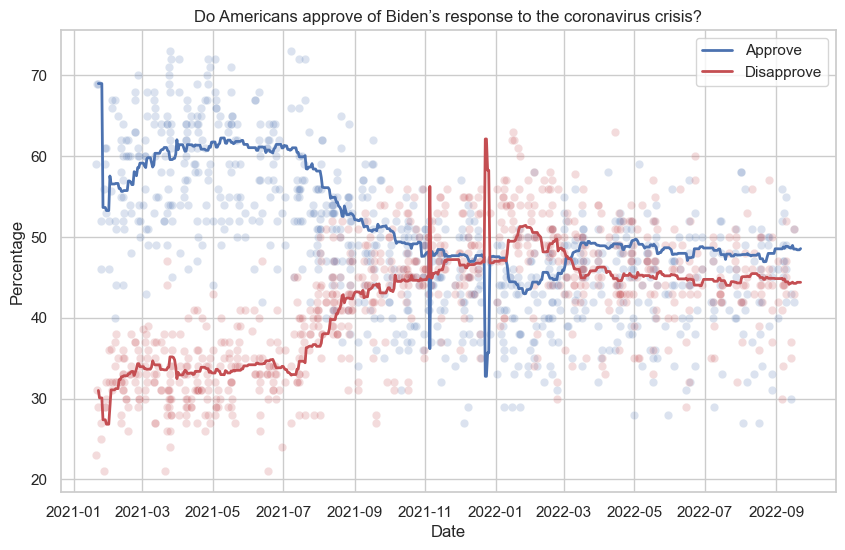

In [1041]:
# Select Biden:
df_covid_approval_toplines_Biden = df_covid_approval_toplines[df_covid_approval_toplines['subject'] != 'Trump']
df_covid_approval_polls_Biden = df_covid_approval_polls[df_covid_approval_polls['subject'] != 'Trump']
df_covid_approval_polls_Biden_1 = df_covid_approval_polls_Biden[df_covid_approval_polls_Biden['party'] != 'R']
df_covid_approval_polls_Biden_1 = df_covid_approval_polls_Biden_1[df_covid_approval_polls_Biden['party'] != 'D']
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_covid_approval_toplines_Biden, x='modeldate',
             y='approve_estimate', errorbar=None, lw=2, label='Approve',color='b')
sns.lineplot(data=df_covid_approval_toplines_Biden,
             x='modeldate', y='disapprove_estimate', errorbar=None, lw=2, label='Disapprove', color='r')
sns.scatterplot(data=df_covid_approval_polls_Biden_1, x='start_date',y='approve', alpha=0.2, color='b')
sns.scatterplot(data=df_covid_approval_polls_Biden_1, x='start_date', y='disapprove', alpha=0.2, color='r')
plt.title('Do Americans approve of Biden’s response to the coronavirus crisis?')
plt.xlabel('Date')
plt.ylabel('Percentage')
plt.legend()
plt.show()

#### Part1-2. Do Americans approve of Trump’s response to the coronavirus crisis?
A calculation of the share of all Americans who approve of the president’s handling of the coronavirus outbreak

In [970]:
# Select Trump:
df_covid_approval_toplines_Trump = df_covid_approval_toplines[df_covid_approval_toplines['subject'] != 'Biden']
# Filter data to remove rows after 2021-05
df_covid_approval_toplines_Trump = df_covid_approval_toplines_Trump[df_covid_approval_toplines_Trump['modeldate']
                                                                    <= pd.to_datetime('2021-05-01')]

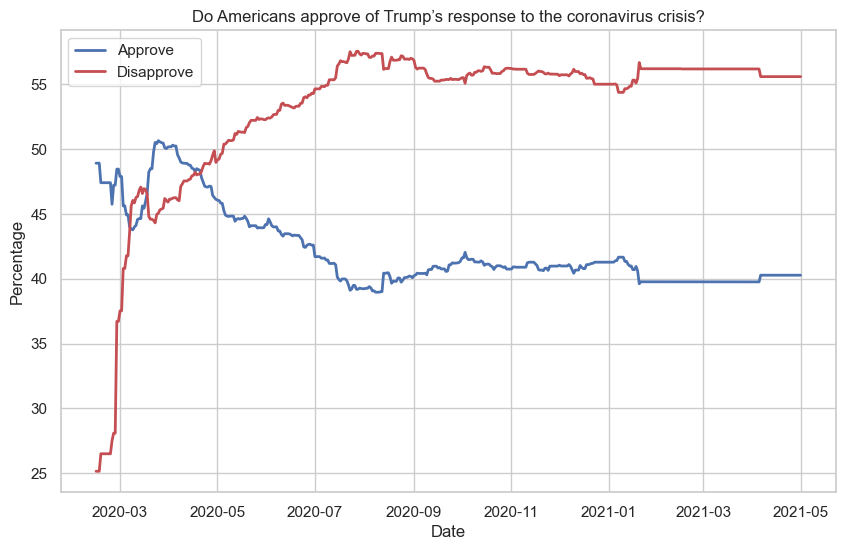

In [971]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_covid_approval_toplines_Trump, x='modeldate',
             y='approve_estimate', errorbar=None, lw=2, label='Approve',color='b')
sns.lineplot(data=df_covid_approval_toplines_Trump,x='modeldate', 
             y='disapprove_estimate', errorbar=None, lw=2, label='Disapprove', color='r')
plt.title('Do Americans approve of Trump’s response to the coronavirus crisis?')
plt.xlabel('Date')
plt.ylabel('Percentage')
plt.legend()
plt.show()

#### Part2-1. Approval of Biden’s response varies widely by party
A calculation of the share of Democrats, Republicans and independents who approve of the president’s handling of the coronavirus outbreak


In [ ]:
# Combine respect to party: all and l should combine to Indipendent
df_covid_approval_toplines_Biden['party'] = df_covid_approval_toplines_Biden['party'].str.replace('I', 'Independents')
df_covid_approval_toplines_Biden['party'] = df_covid_approval_toplines_Biden['party'].str.replace('all', 'Independents')
df_covid_approval_polls_Biden['party'] = df_covid_approval_polls_Biden['party'].str.replace('I', 'Independents')
df_covid_approval_polls_Biden['party'] = df_covid_approval_polls_Biden['party'].str.replace('all', 'Independents')

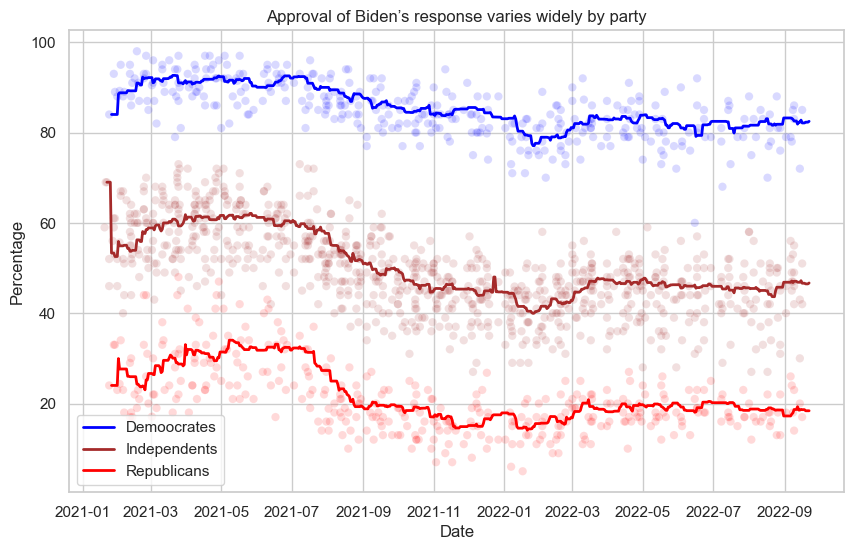

In [986]:
# Define custom colors for each category
custom_palette = {'R': 'red',
                  'Independents': 'brown',
                  'D': 'blue'}

plt.figure(figsize=(10, 6))

sns.lineplot(data=df_covid_approval_toplines_Biden, palette=custom_palette,
             x='modeldate', y='approve_estimate', hue='party', errorbar=None, lw=2, legend=False)
sns.scatterplot(data=df_covid_approval_polls_Biden, x='start_date', y='approve', hue='party',
                 legend=False, palette=custom_palette, alpha=0.15)

plt.legend(['Demoocrates', 'Independents', 'Republicans'])
plt.title('Approval of Biden’s response varies widely by party')
plt.xlabel('Date')
plt.ylabel('Percentage')
plt.show()

#### Part2-2. Approval of Trump’s response varies widely by party
A calculation of the share of Democrats, Republicans and independents who approve of the president’s handling of the coronavirus outbreak


In [974]:
# Combine respect to party: all and l should combine to Indipendent
df_covid_approval_toplines_Trump['party'] = df_covid_approval_toplines_Trump['party'].str.replace('I', 'Independents')
df_covid_approval_toplines_Trump['party'] = df_covid_approval_toplines_Trump['party'].str.replace('all', 'Independents')

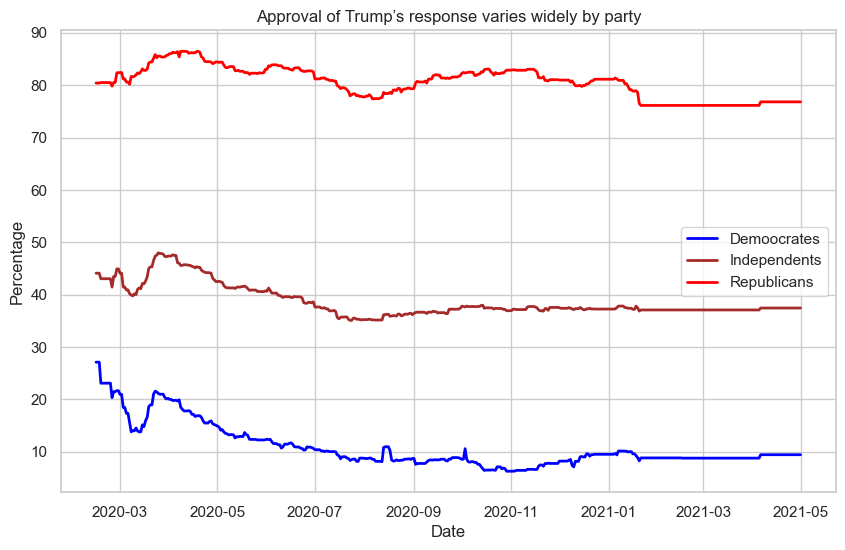

In [985]:
plt.figure(figsize=(10, 6))

sns.lineplot(data=df_covid_approval_toplines_Trump, palette=custom_palette,
             x='modeldate', y='approve_estimate', hue='party', errorbar=None, lw=2, legend=False)

plt.legend(['Demoocrates', 'Independents', 'Republicans'])
plt.title('Approval of Trump’s response varies widely by party')
plt.xlabel('Date')
plt.ylabel('Percentage')
plt.show()

#### Part3-1. How worried are Americans about infection?
How concerned Americans say they are that they, someone in their family or someone else they know will become infected with the coronavirus

In [976]:
df_covid_concern_toplines.head()

,subject,modeldate,party,very_estimate,somewhat_estimate,not_very_estimate,not_at_all_estimate,timestamp
0,concern-economy,2022-03-02,all,48.953147,35.466522,10.451832,3.739761,15:12:25 2 Mar 2022
1,concern-infected,2022-03-02,all,24.186896,32.532791,26.515491,16.539938,15:12:28 2 Mar 2022
2,concern-economy,2022-03-01,all,48.953147,35.466522,10.451832,3.739761,04:08:53 2 Mar 2022
3,concern-infected,2022-03-01,all,24.186896,32.532791,26.515491,16.539938,04:09:00 2 Mar 2022
4,concern-economy,2022-02-28,all,49.041857,35.450926,10.346955,3.744365,10:58:25 28 Feb 2022


In [977]:
# Select infection concern
df_covid_concern_toplines_infection = df_covid_concern_toplines[df_covid_concern_toplines['subject'] != 'concern-economy']
# Filter data to remove rows after 2021-05
df_covid_concern_toplines_infection = df_covid_concern_toplines_infection[df_covid_concern_toplines_infection['modeldate']
                                                                          <= pd.to_datetime('2021-05-31')]

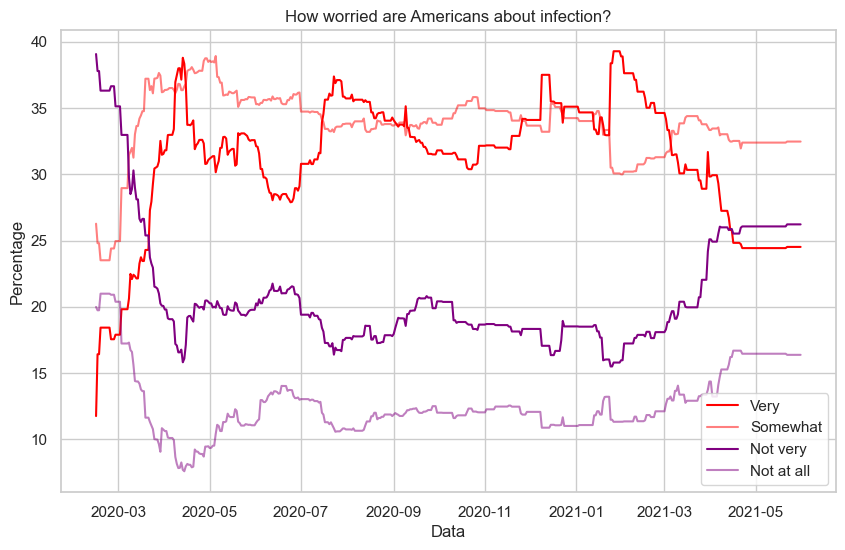

In [990]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_covid_concern_toplines_infection, x='modeldate', y='very_estimate', errorbar=None, color='red',
             alpha=1, label='Very')
sns.lineplot(data=df_covid_concern_toplines_infection, x='modeldate', y='somewhat_estimate', errorbar=None, color='red',
             alpha=0.5, label='Somewhat')
sns.lineplot(data=df_covid_concern_toplines_infection, x='modeldate', y='not_very_estimate', errorbar=None, color='purple',
             alpha=1, label='Not very')
sns.lineplot(data=df_covid_concern_toplines_infection, x='modeldate', y='not_at_all_estimate', errorbar=None, color='purple',
             alpha=0.5, label='Not at all')
plt.legend()
plt.title('How worried are Americans about infection?')
plt.xlabel('Data')
plt.ylabel('Percentage')
plt.show()

#### Part3-2. How worried are Americans about the economy?
How concerned Americans say they are about the coronavirus’s effect on the U.S. economy


In [987]:
# Select economy concern
df_covid_concern_toplines_economy = df_covid_concern_toplines[df_covid_concern_toplines['subject'] == 'concern-economy']
# Filter data to remove rows after 2021-05
df_covid_concern_toplines_economy= df_covid_concern_toplines_economy[df_covid_concern_toplines_economy['modeldate']
                                                                          <= pd.to_datetime('2021-05-31')]

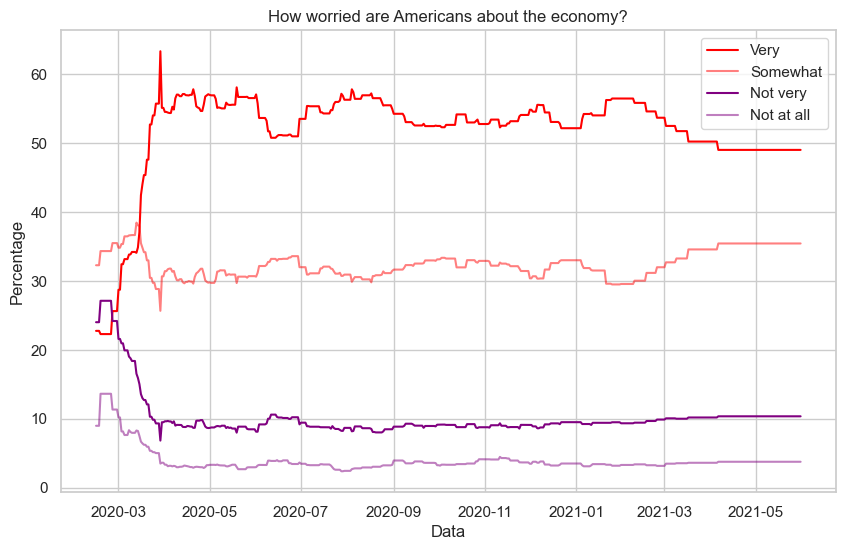

In [991]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_covid_concern_toplines_economy, x='modeldate', y='very_estimate', errorbar=None, color='red',
             alpha=1, label='Very')
sns.lineplot(data=df_covid_concern_toplines_economy, x='modeldate', y='somewhat_estimate', errorbar=None, color='red',
             alpha=0.5, label='Somewhat')
sns.lineplot(data=df_covid_concern_toplines_economy, x='modeldate', y='not_very_estimate', errorbar=None, color='purple',
             alpha=1, label='Not very')
sns.lineplot(data=df_covid_concern_toplines_economy, x='modeldate', y='not_at_all_estimate', errorbar=None, color='purple',
             alpha=0.5, label='Not at all')
plt.legend()
plt.title('How worried are Americans about the economy?')
plt.xlabel('Data')
plt.ylabel('Percentage')
plt.show()

**Explain your approach and assumptions once this section is completed.**

I did everything that this question required. I plotted the exact same references and figures that the TA sent to the Telegram group.

For more information please read my comments in each part